In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

In [3]:
from seabird.cnv import fCNV
profile = fCNV('/ocean/sallen/allen/research/Falkor/5_bin/FK009A_CTD002_20130819.cnv')

DEBUG:root:Openning file: /ocean/sallen/allen/research/Falkor/5_bin/FK009A_CTD002_20130819.cnv


In [4]:
profile.keys()

['LATITUDE',
 'LONGITUDE',
 'timeQ',
 'PRES',
 'TEMP',
 'TEMP2',
 'CNDC',
 'CNDC2',
 'PSAL',
 'PSAL2',
 'oxigen_ml_L',
 'oxigenvoltage',
 'flECO-AFL',
 'turbWETntu0',
 'CStarTr0',
 'PSAL',
 'PSAL2',
 'potemperature',
 'potemperature2',
 'sigma-�00',
 'sigma-�11',
 'oxigen_ml_L',
 'nbin',
 'flag',
 'timeS']

In [5]:
pressure = profile['PRES'][:]
PT = profile['potemperature'][:]
T = profile['TEMP'][:]
SP = profile['PSAL'][:]
lat = profile['LATITUDE'][:]
lon = profile['LONGITUDE'][:]
time = profile['timeS']

In [6]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]

In [7]:
j, i = geo_tools.find_closest_model_point(
           -124.68511,48.48628,lon_model,lat_model,tols={
    'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

In [8]:
j,i

(271, 628)

In [9]:
import gsw

z = gsw.z_from_p(-pressure, lat)

In [10]:
def falkor_locations(profile):

    pressure = profile['PRES'][:]
    PT = profile['potemperature'][:]
    T = profile['TEMP'][:]
    SP = profile['PSAL'][:]
    lat = np.nanmean(profile['LATITUDE'][:])
    lon = np.nanmean(profile['LONGITUDE'][:])
    
    z = gsw.z_from_p(-pressure, lat)
    
    falkor_scalar_ts = namedtuple('falkor_scalar_ts', 'temp, sal, lat, lon, z')

    return falkor_scalar_ts(PT, SP, lat, lon, z)

In [11]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict

import os


temp_location = np.empty((41,z.shape[0]))
sal_location = np.empty((41,z.shape[0]))
lat_location = np.empty(41)
lon_location = np.empty(41)


file = []

i = 0
for file_number in sorted(glob.glob('/home/ssahu/saurav/Falkor_code/*.cnv')):
    
    file.append(file_number)
    
#     if file != '/ocean/sallen/allen/research/Falkor/5_bin/FK*up_*.cnv':
        
#         falkor_scalar_ts = falkor_locations(fCNV(file))
        
# #         temp_location = np.empty((41,falkor_scalar_ts[0].shape[0]))
# #         sal_location = np.empty((41,falkor_scalar_ts[0].shape[0]))
# #         lat_location = np.empty(41)
# #         lon_location = np.empty(41)
#         temp_location[i,:] = falkor_scalar_ts[0]
#         sal_location[i,:] = falkor_scalar_ts[1]
#         lat_location[i] = falkor_scalar_ts[2]
#         lon_location[i] = falkor_scalar_ts[3]
    
    i = i+1
#     else:
#         continue


In [12]:
temp_location = []
sal_location = []
lat_location = []
lon_location = []
z_location = []
# sal_location[j,:] = falkor_scalar_ts[1]
# lat_location[j] = falkor_scalar_ts[2]
# lon_location[j] = falkor_scalar_ts[3]


for j in np.arange(len(file)):

    falkor_scalar_ts = falkor_locations(fCNV(file[j]))
    
    
    temp_that_file = np.empty(falkor_scalar_ts[0].shape)
    temp_that_file = falkor_scalar_ts[0]
    temp_location.append(temp_that_file)
    
    sal_that_file = np.empty(falkor_scalar_ts[1].shape)
    sal_that_file = falkor_scalar_ts[1]
    sal_location.append(sal_that_file)
    
    
    z_that_file = np.empty(falkor_scalar_ts[4].shape)
    z_that_file = falkor_scalar_ts[4]
    z_location.append(z_that_file)    
    
    lat_that_file = np.empty(falkor_scalar_ts[2].shape)
    lat_that_file = falkor_scalar_ts[2]
    lat_location.append(lat_that_file)
    
    lon_that_file = np.empty(falkor_scalar_ts[3].shape)
    lon_that_file = falkor_scalar_ts[3]
    lon_location.append(lon_that_file)
    
    
    

    
temp_location = np.array(temp_location)
sal_location = np.array(sal_location)
z_location = np.array(z_location)
lat_location = np.array(lat_location)
lon_location = np.array(lon_location)

#     temp_location = np.append(arr=temp_location, values = temp_that_file ,axis=0)


#     sal_location[j,:] = falkor_scalar_ts[1]
#     lat_location[j] = falkor_scalar_ts[2]
#     lon_location[j] = falkor_scalar_ts[3]

DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD002_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD003_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD004_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD005_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD006_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD007_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD008_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD009_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD010_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD011_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD012_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD013_20130

#### Find out for our NEP36 model results the locations where the Falkor data is available

In [13]:
y = np.empty_like(lat_location)
x = np.empty_like(lat_location)


for i in np.arange(lat_location.shape[0]):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_location[i],lat_location[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

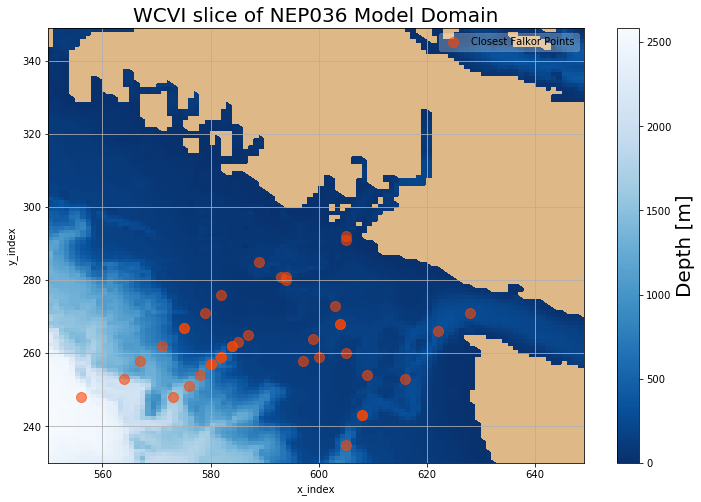

In [14]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

# Z = bathy.variables['Bathymetry'][y_wcvi_slice,x_wcvi_slice]
Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

# z0 = np.ma.masked_values(Z, 0)
# plt.plot(lon[::10,::10],lat[::10,::10],'m.')
cmap = plt.get_cmap('Blues_r')
# cmap.set_bad('gainsboro')
# cmap = cmo.cm.deep
cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(12,8)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
# ax.plot(
#     x[:], y[:], marker='o', color='cyan',
#     label='Falkor Data Points',
# )
ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.6, label = 'Closest Falkor Points')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
n=20
n1 = 10
# ax.scatter(lon[::n,::n], lat[::n,::n], c='orangered', s=30, alpha=0.6)
# ax.scatter(lon[270:350:n1,550:650:n1], lat[270:350:n1,550:650:n1], c='cyan', s=30, alpha=0.6)
# ax.set_xlim([lon[270:350,550:650].min(), lon[270:350,550:650].max()])
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
# viz_tools.plot_coastline(ax, bathymetry=bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     labelleft='off')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()
# plt.savefig('domain.png')

In [14]:
np.where(y>279)

(array([21, 22, 23, 24, 31, 32]),)

In [15]:
np.where(x<560)

(array([10]),)

In [16]:
x[20:24]

array([ 603.,  594.,  593.,  605.])

In [17]:
x[32]

594.0

#### We are intersted in the 4 points at the data locations of 21,22,23 and 32 of Falkor and corresponding y,x of the model (NEP36)

In [18]:
print(np.max(z_location[21]), np.max(z_location[22]))

175.579832001 231.162170305


In [19]:
print(x[21],y[21], x[22],y[22])

594.0 281.0 593.0 281.0


#### Let us interpolate our model data to the Falkor vertical depths and make a plot to see how they compare those to the August model results (especially at the depths of the Low oxygen pool since we think that is a semi-permanent feature which means they should do well when compared and not depend upon individual days of August: Verify this ????)

### We have Practical Salinity and Potential temperature from Falkor data and now we need to find out the Spiciness 

In [16]:
SA_falk_loc = np.empty_like(sal_location)
CT_falk_loc = np.empty_like(temp_location)
pressure_falk_loc = np.empty_like(z_location)
spic_falk_loc = np.empty_like(sal_location)


for i in np.arange(lat_location.shape[0]):
    
    pressure_falk_loc[i] = gsw.p_from_z(-z_location[i],lat_location[i])
    
    SA_falk_loc[i] = gsw.SA_from_SP(sal_location[i], pressure_falk_loc[i], lon_location[i], lat_location[i])
    
    CT_falk_loc[i] = gsw.CT_from_pt(sal_location[i], temp_location[i])
    
    spic_falk_loc[i] = gsw.spiciness0(SA_falk_loc[i], CT_falk_loc[i])

    

In [17]:
NEP_aug = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_aug.nc')


sal_aug = NEP_aug.variables['vosaline']
temp_aug = NEP_aug.variables['votemper']
spic_aug = NEP_aug.variables['spiciness']
rho_aug = NEP_aug.variables['density']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


NEP_jul = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_july.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']



In [18]:
spic_aug[12,25,y[21],x[21]]

-0.15072389

In [19]:
zlevels[25]

186.12556

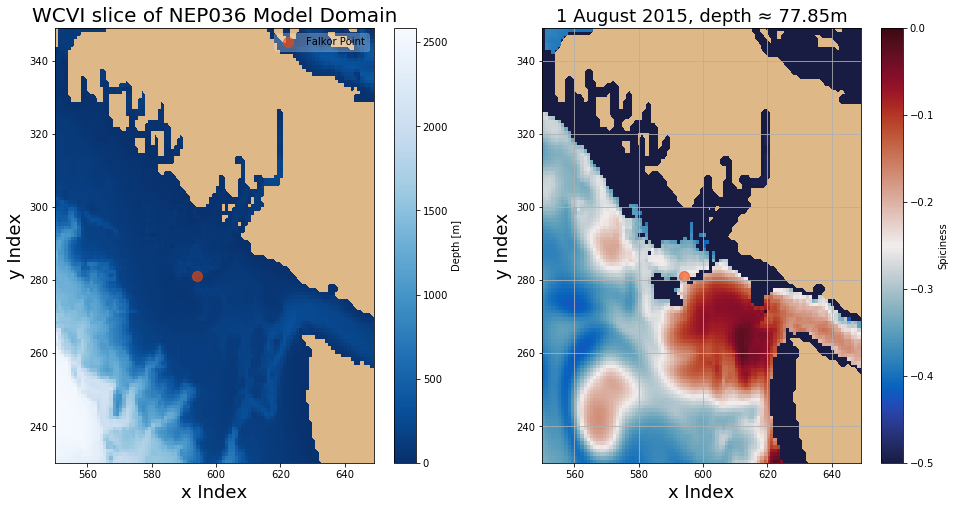

In [20]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


#### At the beginning of the month

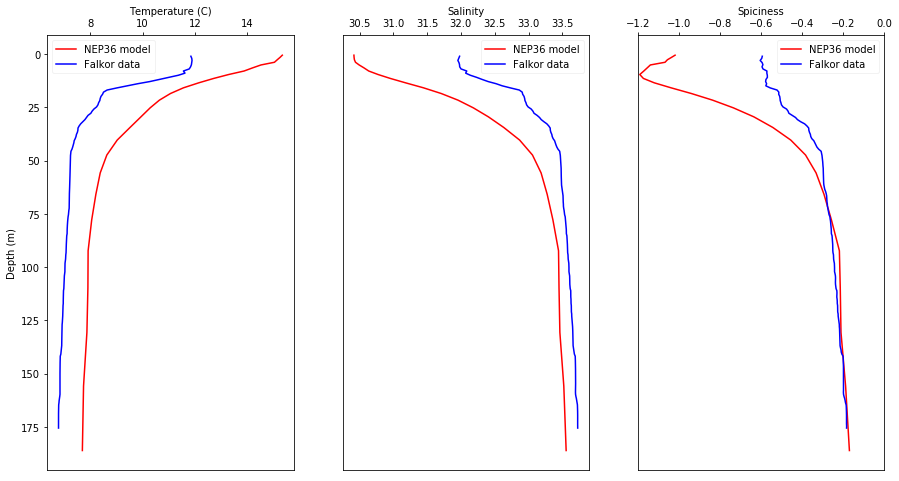

In [25]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

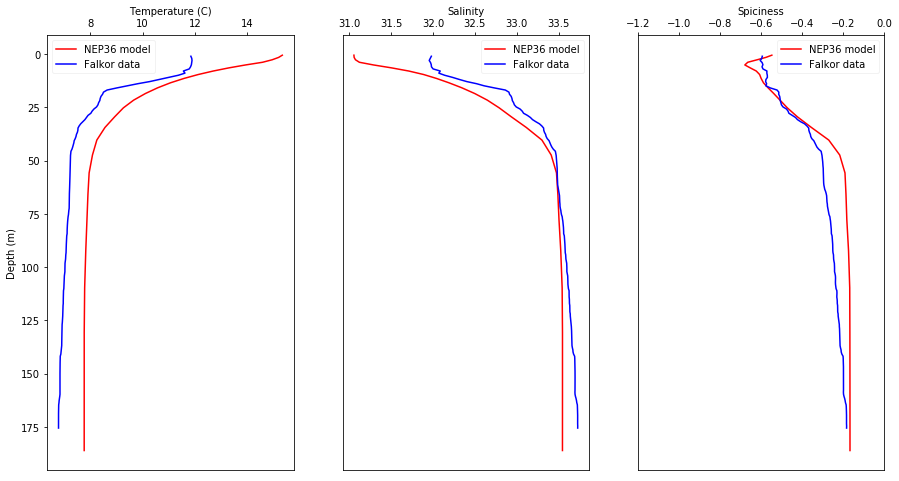

In [27]:
fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[6,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[6,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[6,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.set_xlim(-1.2,0)
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

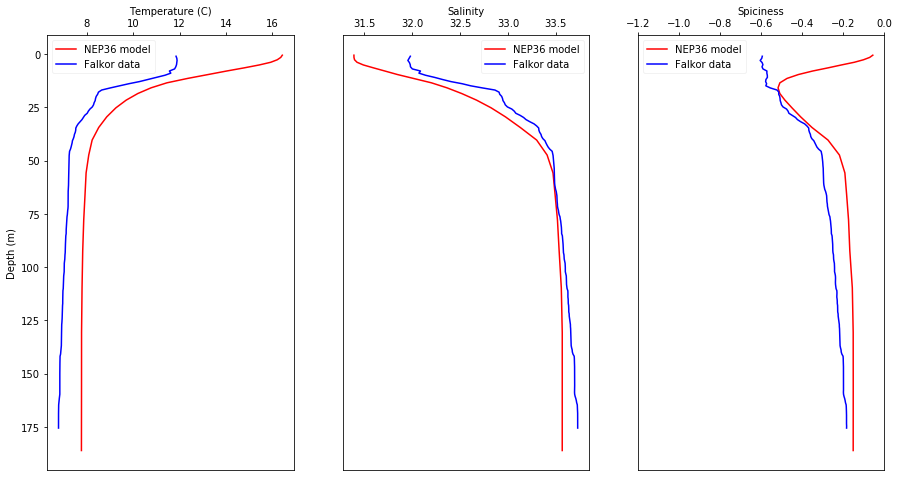

In [28]:
fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[9,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[9,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[9,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

### At August 9 the pool moves into the falkor location (in the model as seen below) so in the Spice plot above we don't see the similar results at 77m depth; this leads us to believe that at this location  the results best matches on August 1 (beginning of the month after which it moves into the hole and makes the results look different from the Falkor observations)

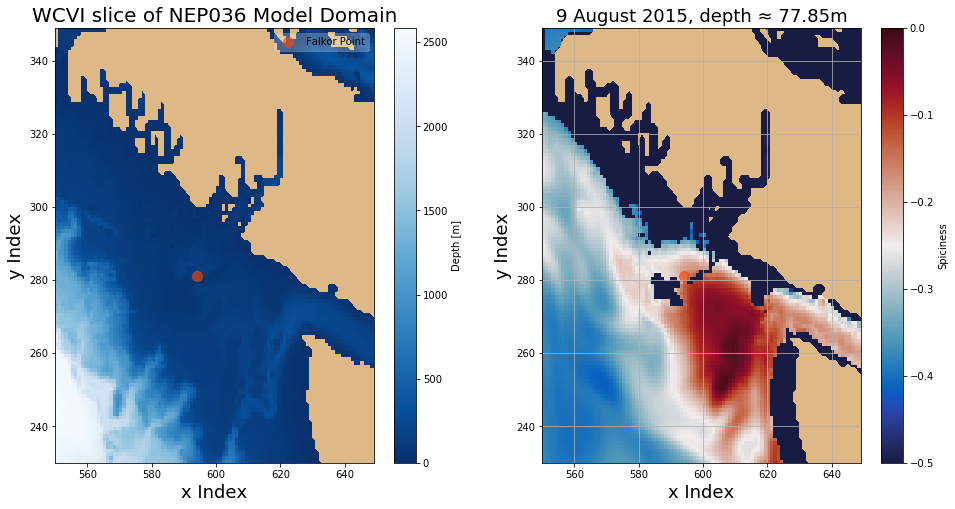

In [138]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 8
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


### Let us take a look at our July results and see if they match with the Falkor

In [3]:
NEP = nc.Dataset('/home/ssahu/saurav/Falkor_code/NEP36_T_S_Spice_july.nc')


sal_jul = NEP.variables['vosaline']
temp_jul = NEP.variables['votemper']
spic_jul = NEP.variables['spiciness']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


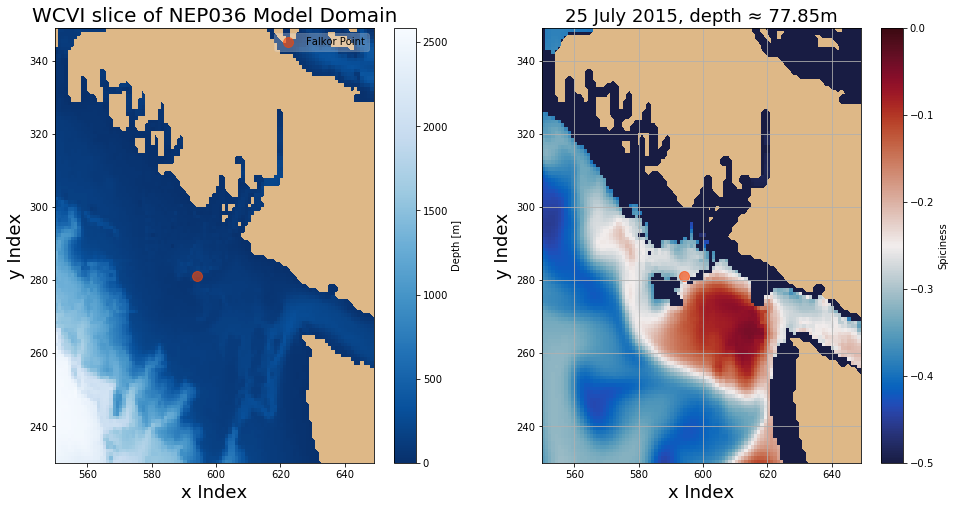

In [31]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 24
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_jul[t_jul,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


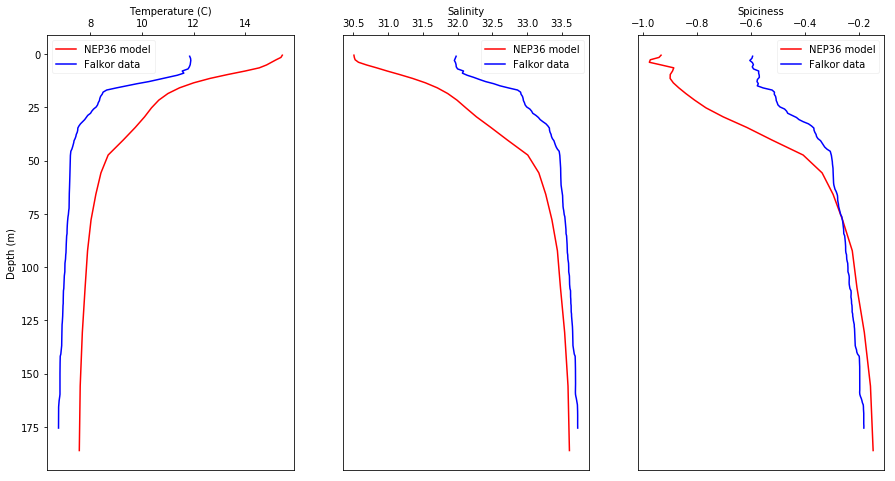

In [33]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[25,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[25,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[25,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

#### We think that the spicy water into the hole is caused by the weakening of the shelf break current and this time the Falkor doesn't match with the model


In [40]:
np.where(y>260)

(array([ 0,  1,  2,  3,  4, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 30,
        31, 32, 33, 38]),)

In [41]:
np.where(x>600)

(array([ 0, 17, 18, 19, 20, 23, 26, 27, 31, 33, 36, 37, 38]),)

In [43]:
y[0]

271.0

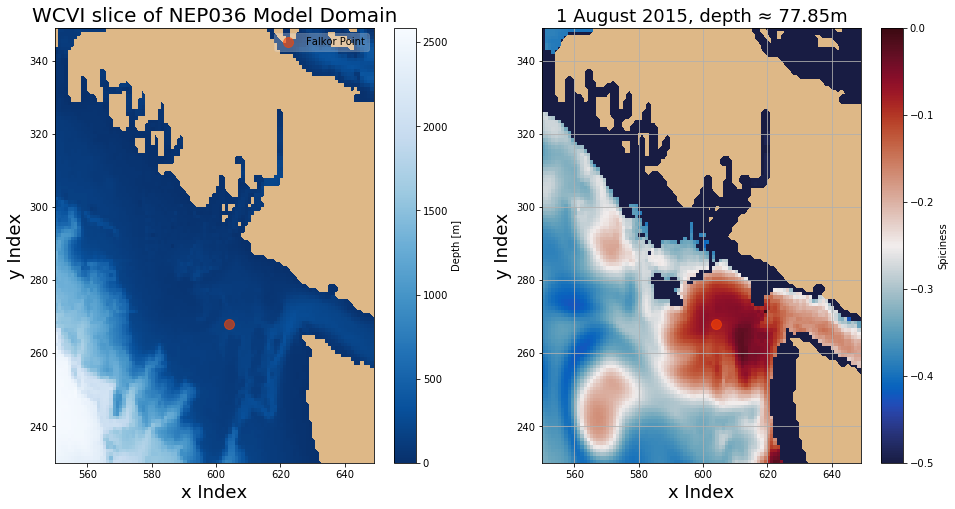

In [28]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


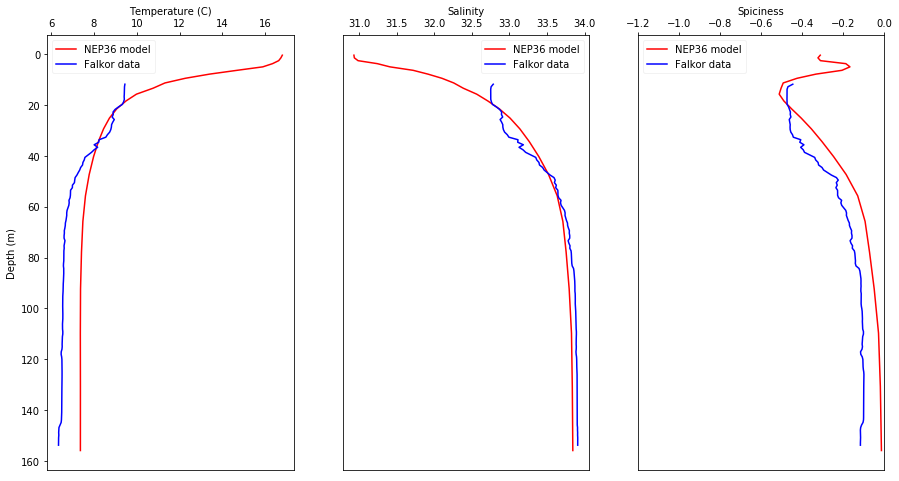

In [56]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

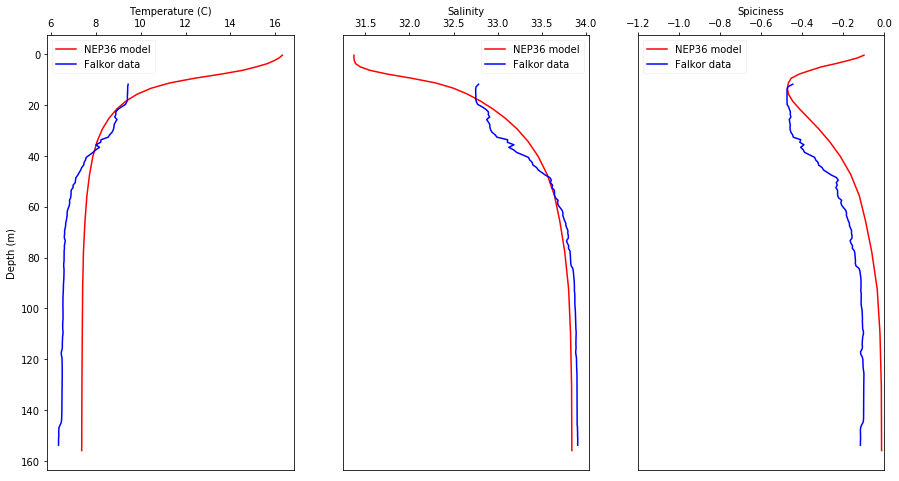

In [57]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[6,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[6,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[6,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

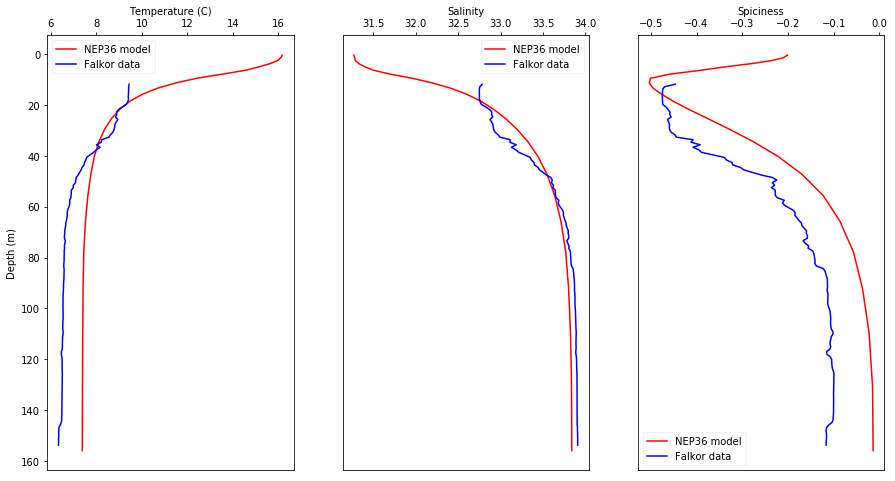

In [71]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[9,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[9,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[9,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

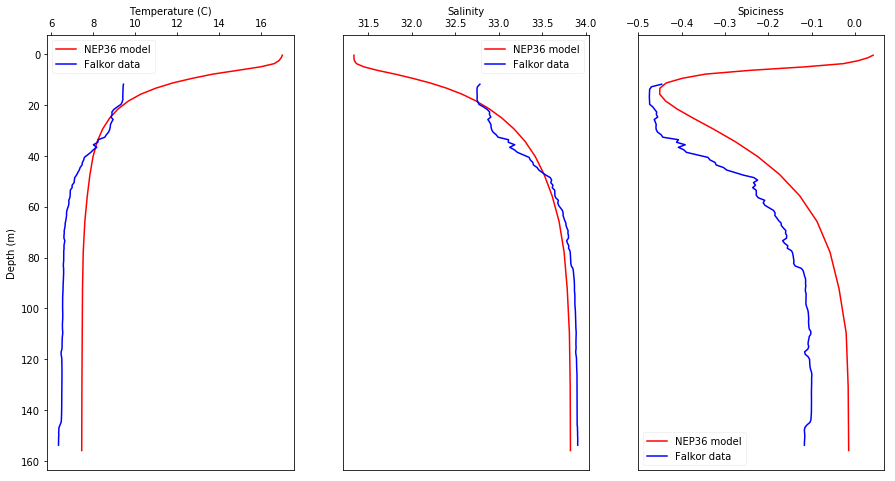

In [70]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[15,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[15,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[15,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

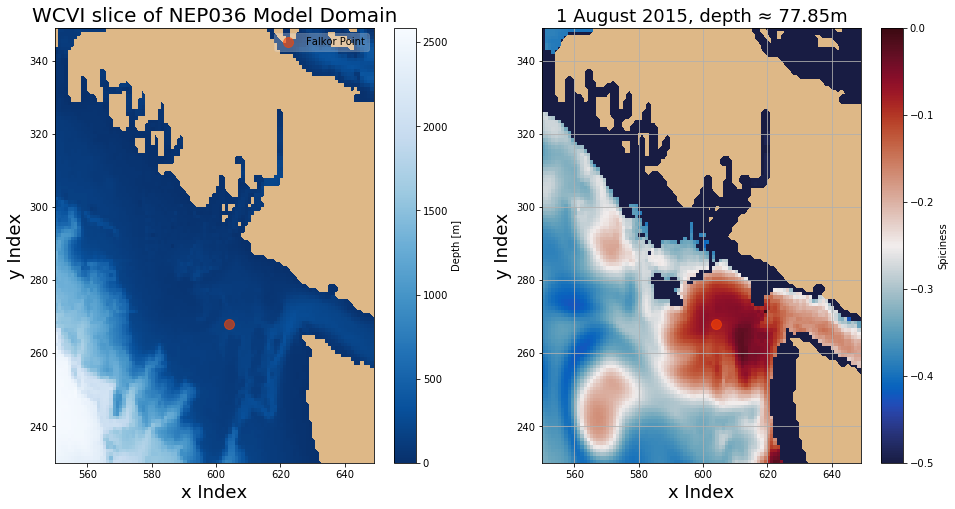

In [77]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


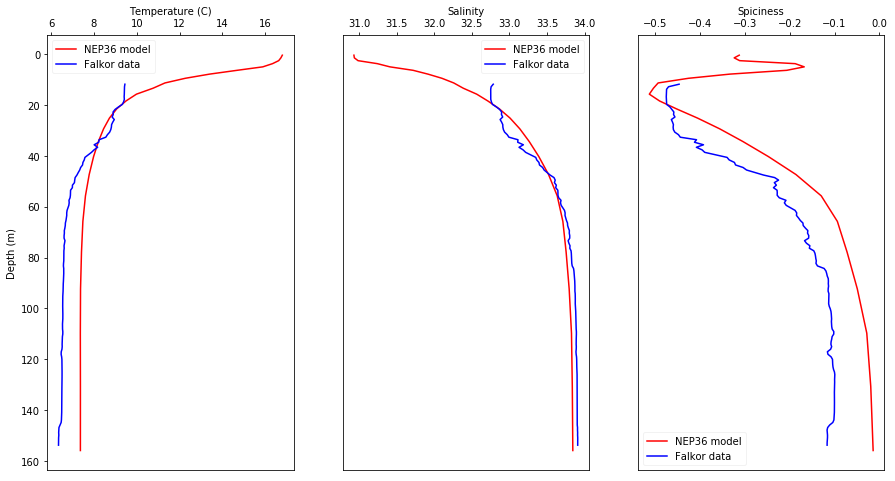

In [78]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

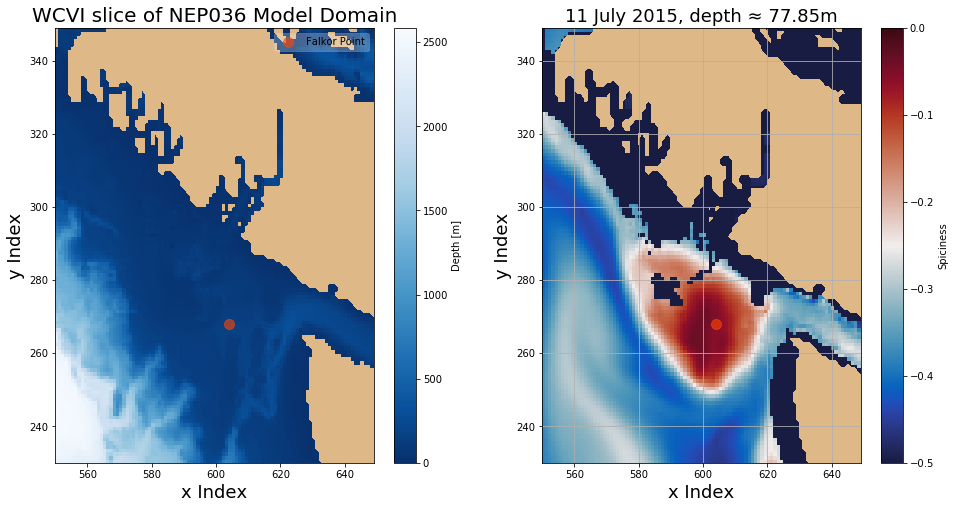

In [67]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 10
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_jul[t_jul,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


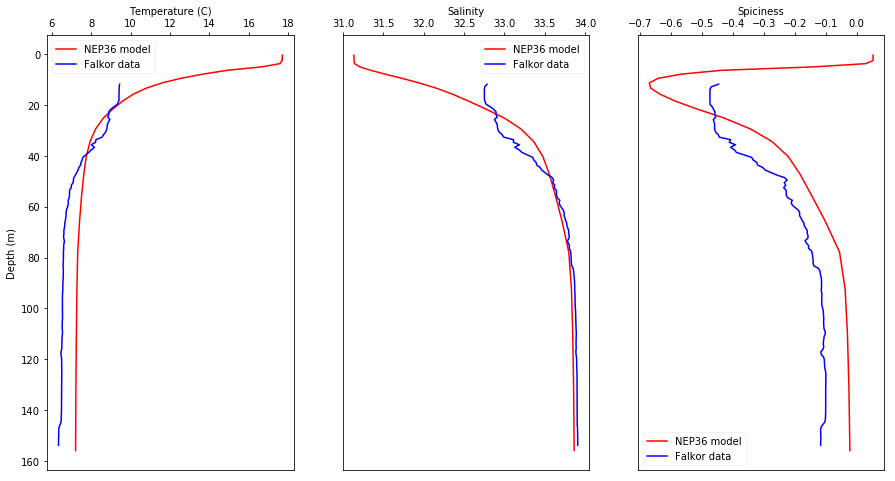

In [69]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[10,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[10,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[10,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

### The data with the model matches much better when we are looking at the end July to August beginning [Confirm this]


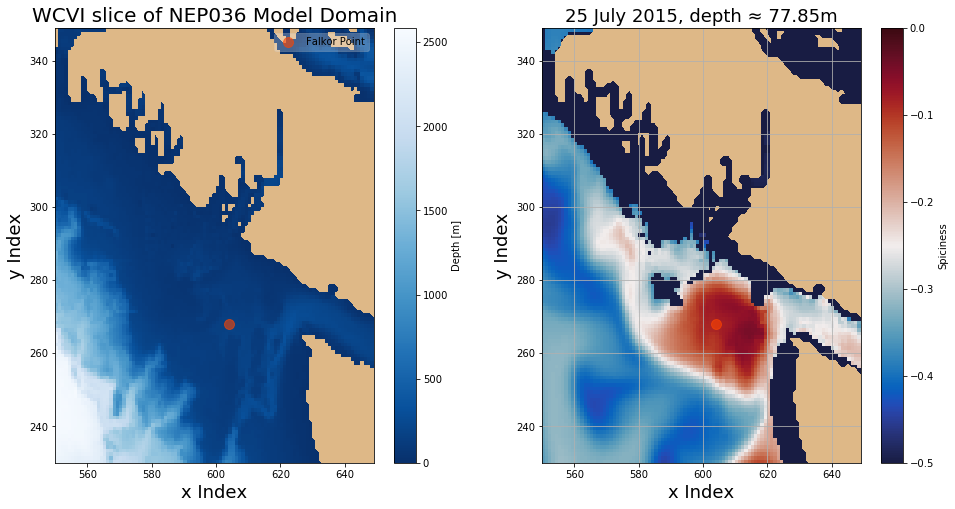

In [72]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 24
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_jul[t_jul,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


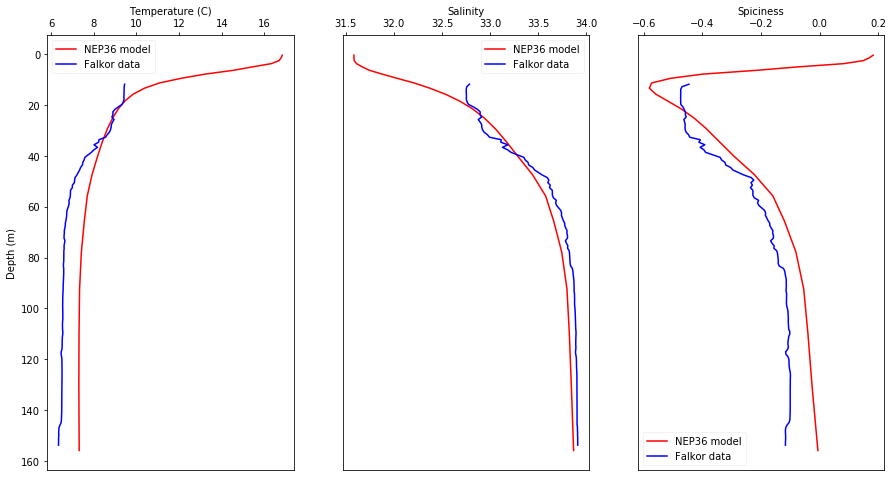

In [73]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[24,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[24,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[24,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

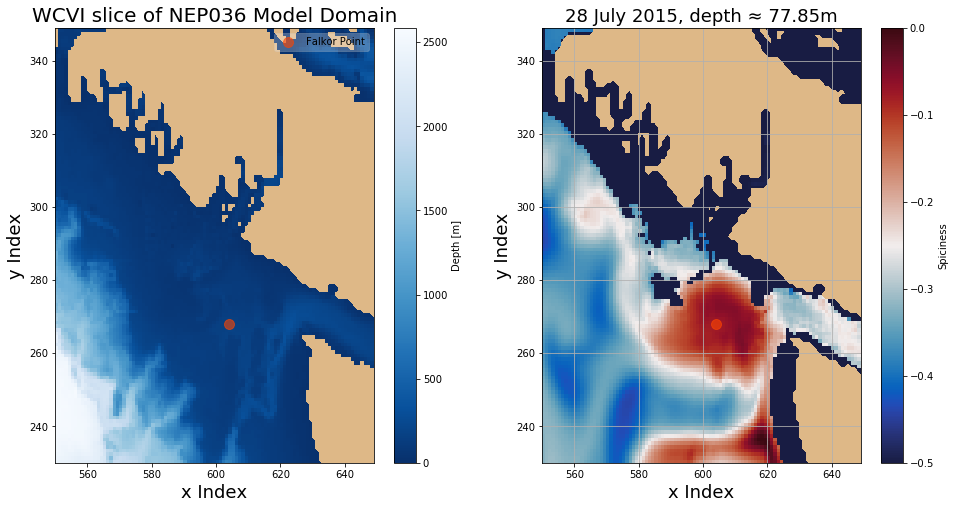

In [74]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 27
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_jul[t_jul,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


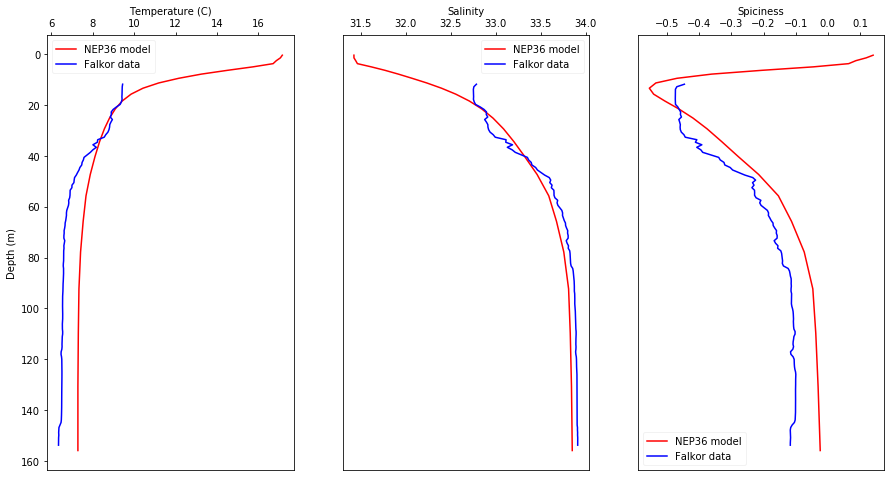

In [75]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[27,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[27,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[27,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

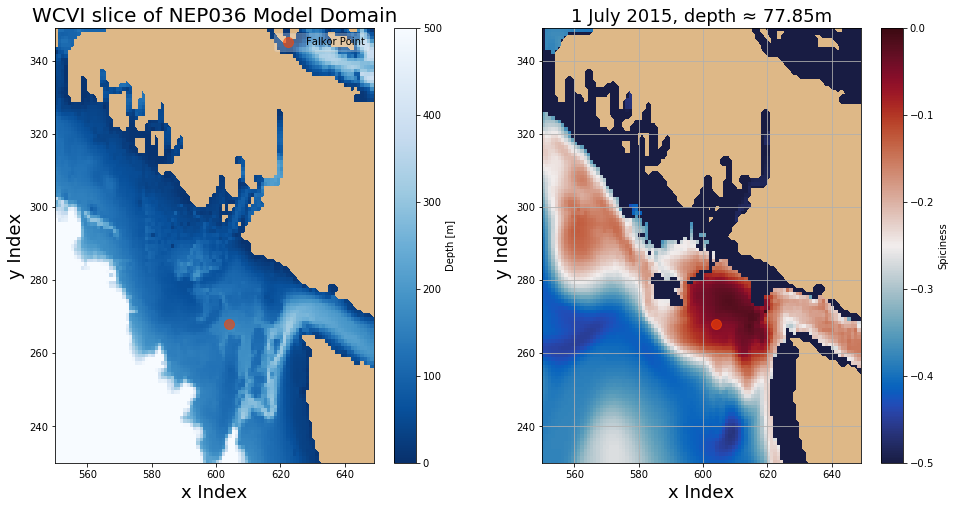

In [67]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 0
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_jul[t_jul,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


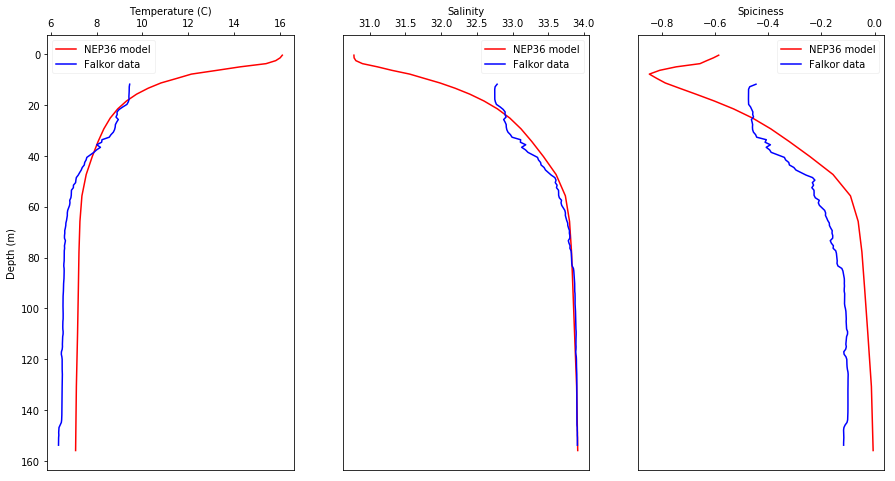

In [84]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[0,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

1) Plot the Falkor Spiciness as points on the spatial pcolormesh and do the same for salinity anomaly and see on which date the values at the data points (at that depth: close to the pool of low oxygen) closely match (find out the days we should be exactly looking at; not randomly on July and August)


2) Specifically for those dates compare the data for those locations


3) Look into the spicy water getting into the hole later in August and see if this is due to the weakening of the  shelf break current going southwards later in August

4) Finish the characterisation of the dense pool by making a 3D plot for the day it is most clearly seen (from salinity anomaly, spiciness and temperature anomaly)

5) The characterisation of the pool would then come into question about the time that it appears, (its relation with the eddy), and the question is it a semi permanent feature ?

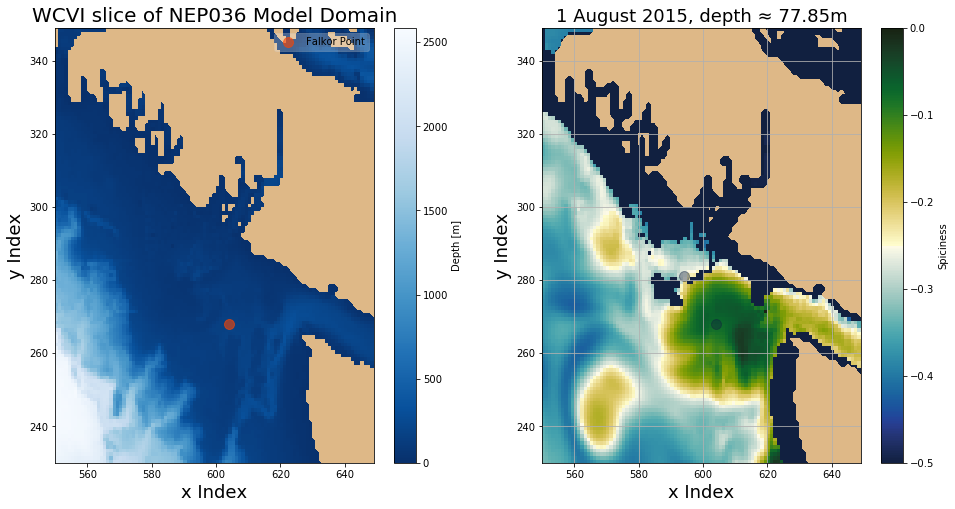

In [82]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20
level_falkor_1 = 66
level_falkor_2 = 77

Z_falk = np.array(z_location[33])
spice_falk = np.array(spic_falk_loc[33])




fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.delta)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[33], y[33], c= spice_falk[level_falkor_1], s=100, alpha=0.4, label = 'Falkor Point', cmap = cmap)
ax2.scatter(x[21], y[21], c= spice_falk[level_falkor_2], s=100, alpha=0.4, label = 'Falkor Point', cmap = cmap)
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


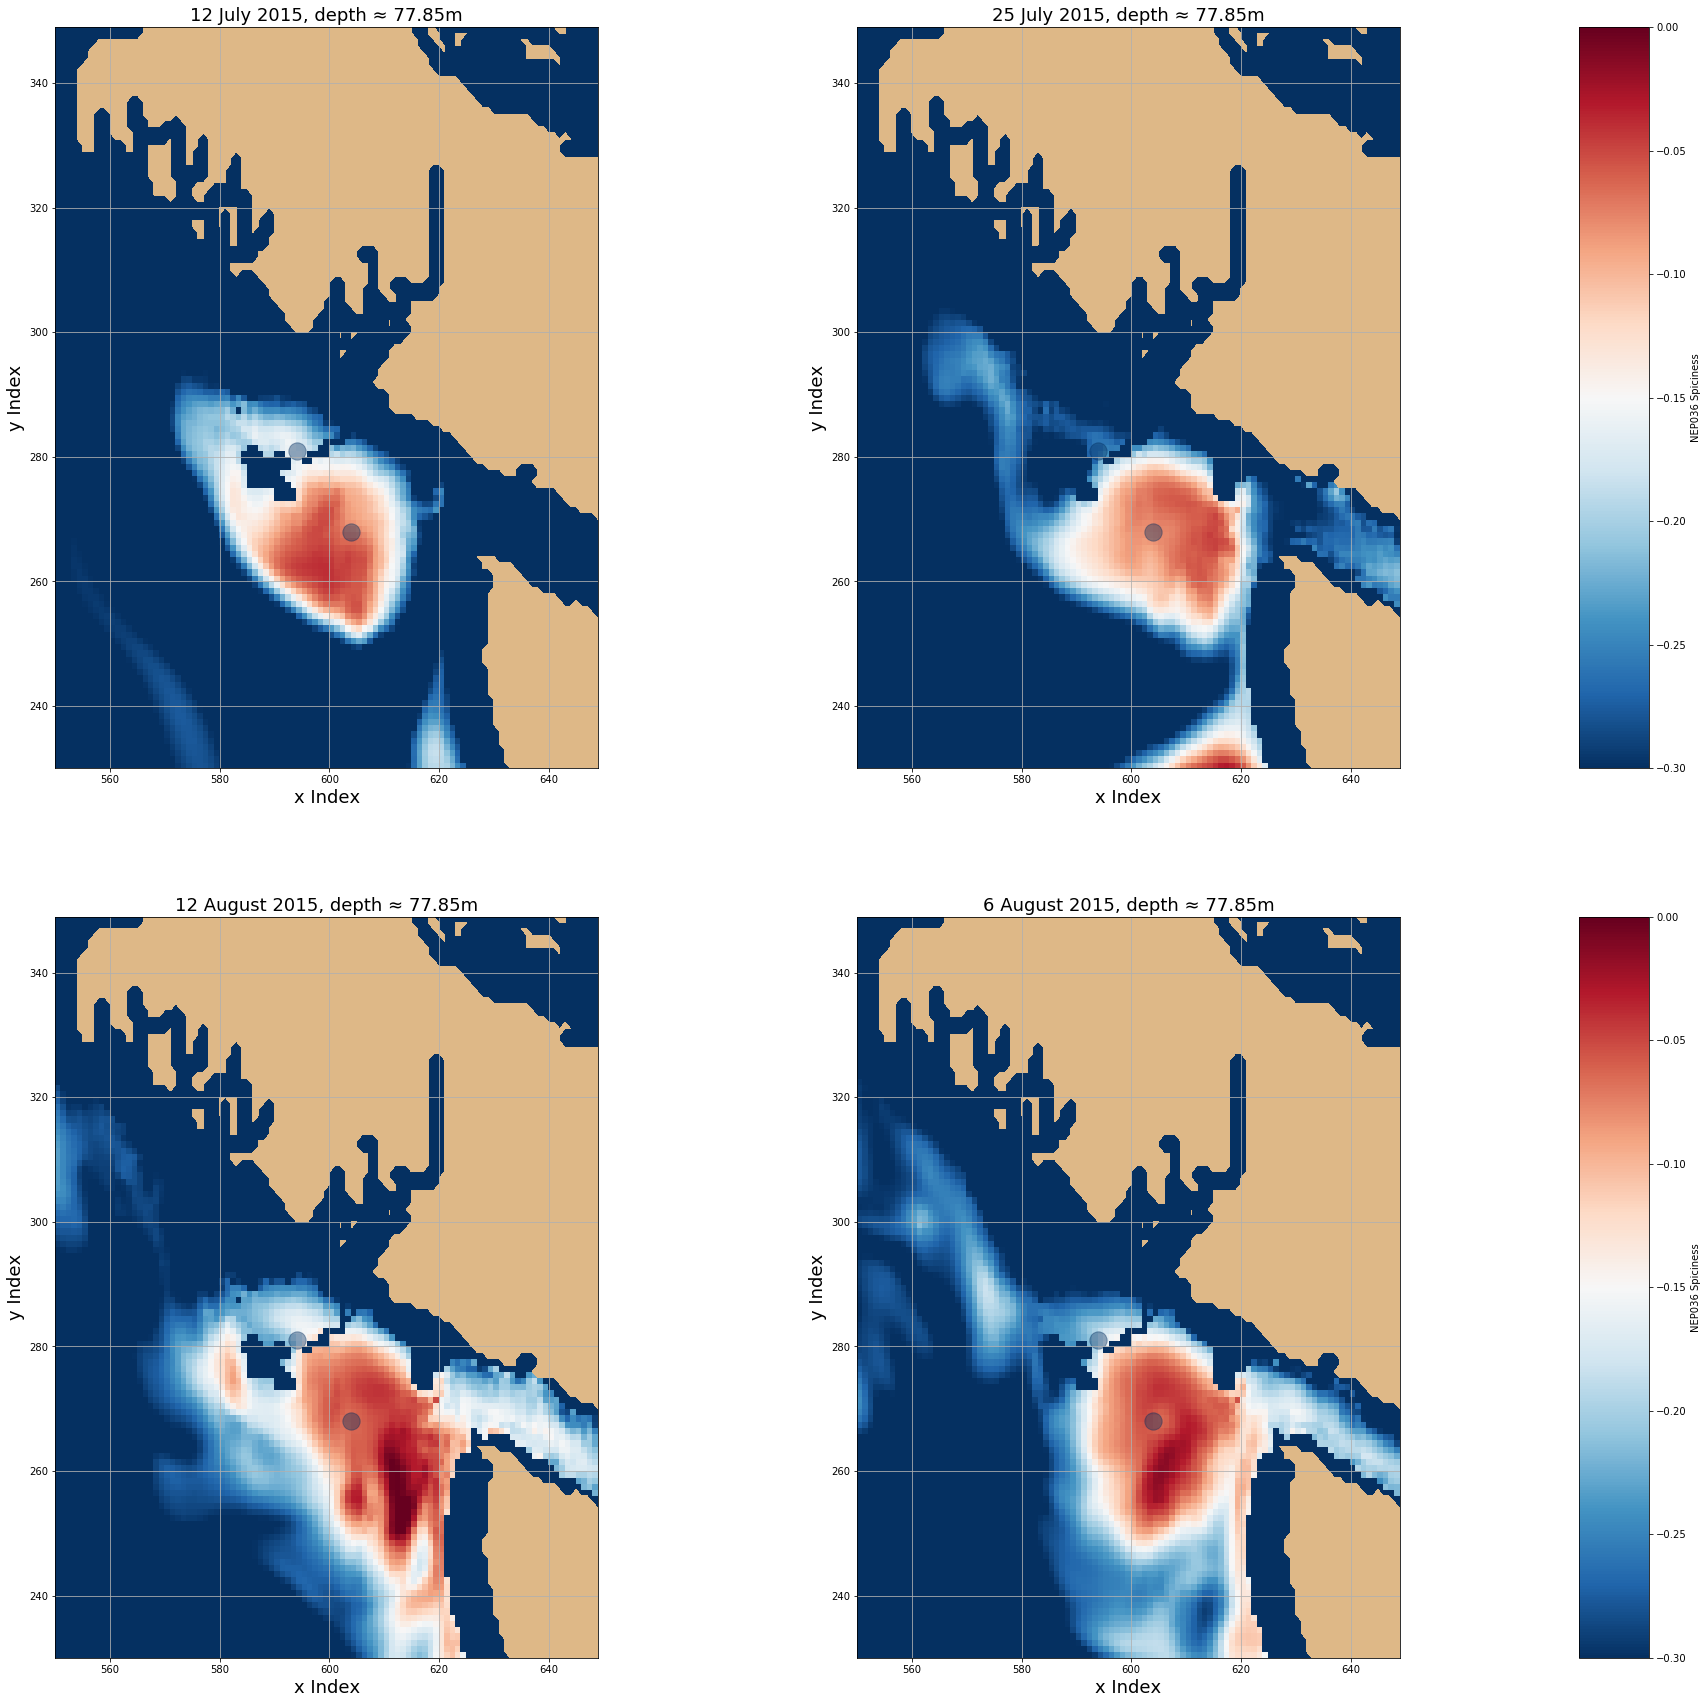

In [128]:
t_aug = 6
t_jul = 25
t = 12
level = 20

loc_fal = 33, 21

level_falkor = 66, 77


Z_falk_1 = np.array(z_location[loc_fal[0]])
spice_falk_1 = np.array(spic_falk_loc[loc_fal[0]])

Z_falk_2 = np.array(z_location[loc_fal[1]])
spice_falk_2 = np.array(spic_falk_loc[loc_fal[1]])




cmap = plt.get_cmap(cm.RdBu_r)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.3,vmax=0)

fig, axs = plt.subplots(2, 3, figsize=(30, 30), gridspec_kw={'width_ratios': [10, 10, 1]})


spic_0 = spic_jul[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
axs[0,0].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[0,0].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,0].grid()


spic_0 = spic_jul[t_jul, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
axs[0,1].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[0,1].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul, d=zlevels[level], z=zlevels),fontsize=18)



cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_0 = spic_aug[t, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
axs[1,0].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[1,0].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t, d=zlevels[level], z=zlevels),fontsize=18)



spic_0 = spic_aug[t_aug, level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[1,1].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[1,1].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug, d=zlevels[level], z=zlevels),fontsize=18)



cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')

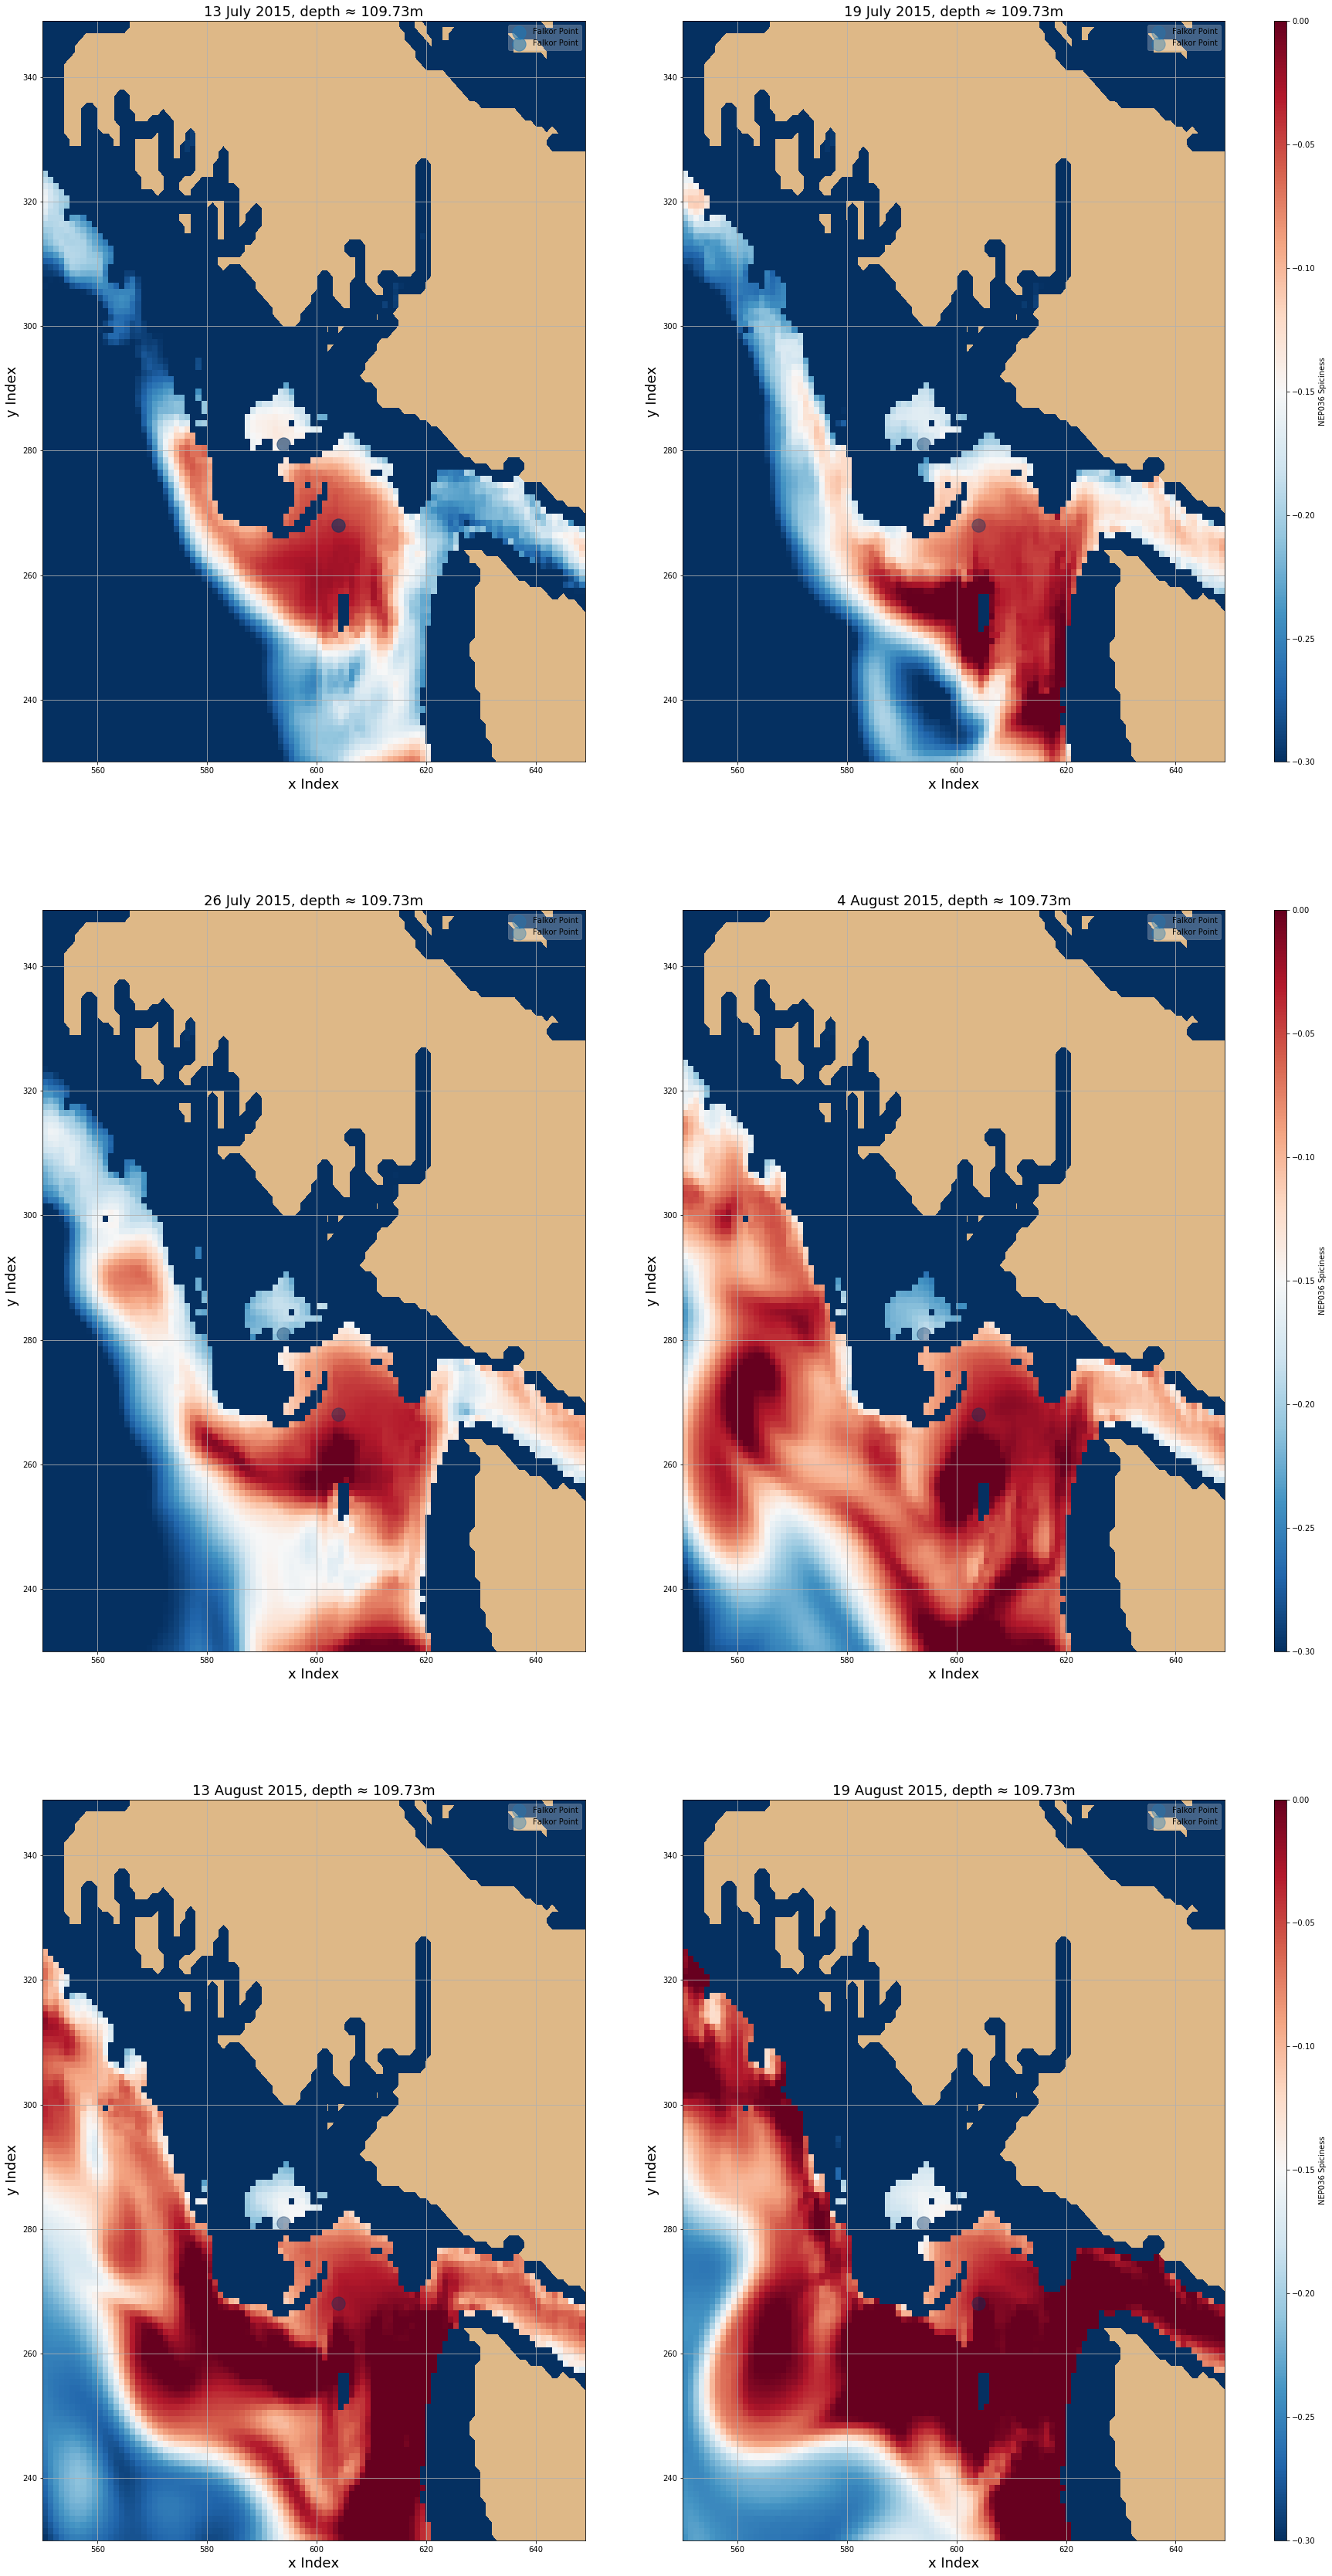

In [209]:
t_aug = 25
t_jul = 12, 18, 25
t_aug = 3, 12, 18
t = 12
level = 22

loc_fal = 33, 21

level_falkor = 99, 110


Z_falk_1 = np.array(z_location[loc_fal[0]])
spice_falk_1 = np.array(spic_falk_loc[loc_fal[0]])

Z_falk_2 = np.array(z_location[loc_fal[1]])
spice_falk_2 = np.array(spic_falk_loc[loc_fal[1]])




cmap = plt.get_cmap(cm.RdBu_r)
# cmap = plt.get_cmap(cmo.cm.oxy_r)
cmap.set_bad('burlywood')

import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=-0.3,vmax=0)

fig, axs = plt.subplots(3, 3, figsize=(30, 60), gridspec_kw={'width_ratios': [50, 50, 1]})

fig.subplots_adjust(wspace=0)

spic_0 = spic_jul[t_jul[0], level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,0])
mesh = axs[0,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
axs[0,0].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.6, label = 'Falkor Point', cmap = cmap)
axs[0,0].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.6, label = 'Falkor Point', cmap = cmap)
viz_tools.plot_land_mask(axs[0,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[0,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,0].set_xlabel('x Index',fontsize=18)
axs[0,0].set_ylabel('y Index',fontsize=18)
axs[0,0].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul[0]+1, d=zlevels[level], z=zlevels),fontsize=18)
axs[0,0].grid()
legend = axs[0,0].legend(loc='best', fancybox=True, framealpha=0.25)

spic_0 = spic_jul[t_jul[1], level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[0,1])
mesh = axs[0,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
axs[0,1].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[0,1].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
viz_tools.plot_land_mask(axs[0,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[0,1].grid()
axs[0,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[0,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[0,1].set_xlabel('x Index',fontsize=18)
axs[0,1].set_ylabel('y Index',fontsize=18)
axs[0,1].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul[1]+1, d=zlevels[level], z=zlevels),fontsize=18)
legend = axs[0,1].legend(loc='best', fancybox=True, framealpha=0.25)


cbar = plt.colorbar(mesh, cax=axs[0,2])
cbar.set_label('NEP036 Spiciness')



spic_0 = spic_jul[t_jul[2], level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,0])
mesh = axs[1,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
axs[1,0].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[1,0].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
viz_tools.plot_land_mask(axs[1,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[1,0].grid()
axs[1,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,0].set_xlabel('x Index',fontsize=18)
axs[1,0].set_ylabel('y Index',fontsize=18)
axs[1,0].set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul[2]+1, d=zlevels[level], z=zlevels),fontsize=18)
legend = axs[1,0].legend(loc='best', fancybox=True, framealpha=0.25)


spic_0 = spic_aug[t_aug[0], level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[1,1])
mesh = axs[1,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
viz_tools.plot_land_mask(axs[1,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[1,1].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[1,1].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[1,1].grid()
axs[1,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[1,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[1,1].set_xlabel('x Index',fontsize=18)
axs[1,1].set_ylabel('y Index',fontsize=18)
axs[1,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug[0]+1, d=zlevels[level], z=zlevels),fontsize=18)
legend = axs[1,1].legend(loc='best', fancybox=True, framealpha=0.25)


cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label('NEP036 Spiciness')


spic_0 = spic_aug[t_aug[1], level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[2,0])
mesh = axs[2,0].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
viz_tools.plot_land_mask(axs[2,0], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[2,0].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[2,0].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[2,0].grid()
axs[2,0].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[2,0].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[2,0].set_xlabel('x Index',fontsize=18)
axs[2,0].set_ylabel('y Index',fontsize=18)
axs[2,0].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug[1]+1, d=zlevels[level], z=zlevels),fontsize=18)
legend = axs[2,0].legend(loc='best', fancybox=True, framealpha=0.25)



spic_0 = spic_aug[t_aug[2], level, :,:]
spic_tzyx = np.ma.masked_values(spic_0, 0)

viz_tools.set_aspect(axs[2,1])
mesh = axs[2,1].pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx[230:350,550:650], cmap=cmap, vmin = -0.3, vmax = 0)
viz_tools.plot_land_mask(axs[2,1], bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
axs[2,1].scatter(x[loc_fal[0]], y[loc_fal[0]], c= spice_falk[level_falkor[0]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[2,1].scatter(x[loc_fal[1]], y[loc_fal[1]], c= spice_falk[level_falkor[1]], s=300, alpha=0.4, label = 'Falkor Point', cmap = cmap)
axs[2,1].grid()
axs[2,1].set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
axs[2,1].set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
axs[2,1].set_xlabel('x Index',fontsize=18)
axs[2,1].set_ylabel('y Index',fontsize=18)
axs[2,1].set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug[2]+1, d=zlevels[level], z=zlevels),fontsize=18)
legend = axs[2,1].legend(loc='best', fancybox=True, framealpha=0.25)

cbar = plt.colorbar(mesh, cax=axs[2,2])
cbar.set_label('NEP036 Spiciness')
plt.savefig('/home/ssahu/Desktop/Falkor_spice_dates.png')

In [148]:
height[99]

110.09364668773703

In [149]:
height = np.array(z_location[21])

In [153]:
height[110]

110.09169424689364

In [69]:
spice_falk[level_falkor_2]

-0.11404807552798957

In [90]:
z_location.shape

(39,)

In [65]:
height = []



for i in np.arange(z_location.shape[0]):
    height_loc = np.array(z_location[i])
    height = np.concatenate((height, height_loc), axis = 1)
#     height = np.stack(height_loc)
#     height.append(height_loc)

AxisError: axis 1 is out of bounds for array of dimension 1

In [102]:
height[33]

34.707961250914778

In [107]:
height.shape

(18272,)

In [182]:
spice_falk[level_falkor[1]]

-0.10441087046208963

In [185]:
spic_tzyx[y[33],x[33]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

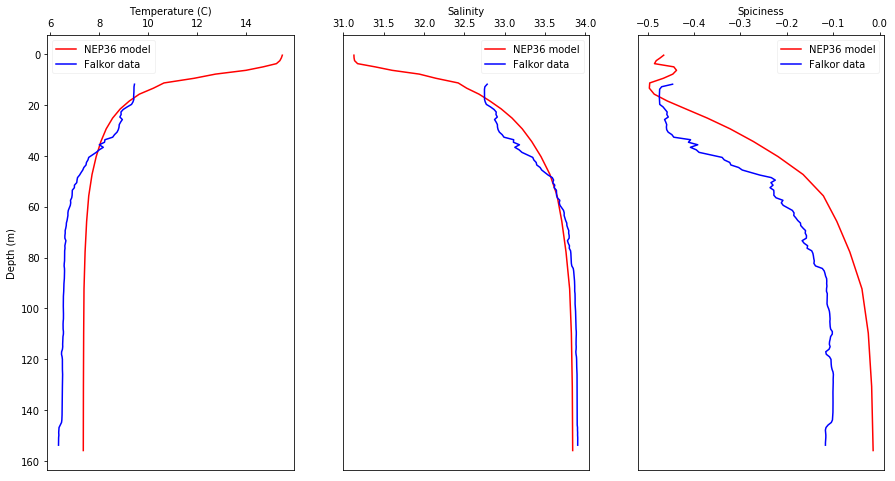

In [210]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[3,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[3,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[3,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

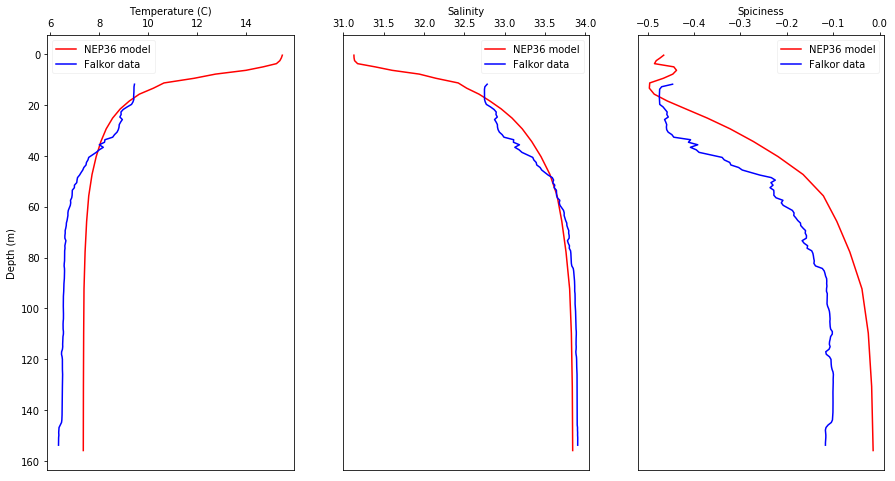

In [204]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[3,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[3,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[3,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

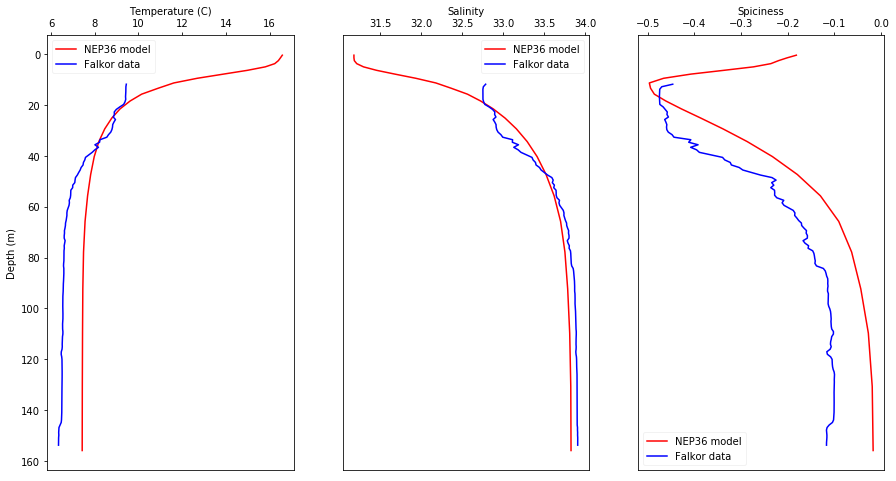

In [211]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[12,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[12,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[12,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

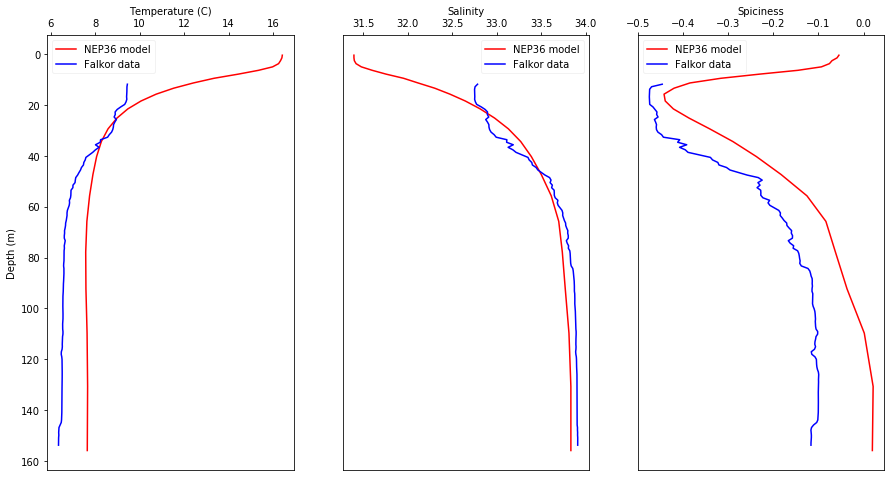

In [212]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[18,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[18,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[18,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

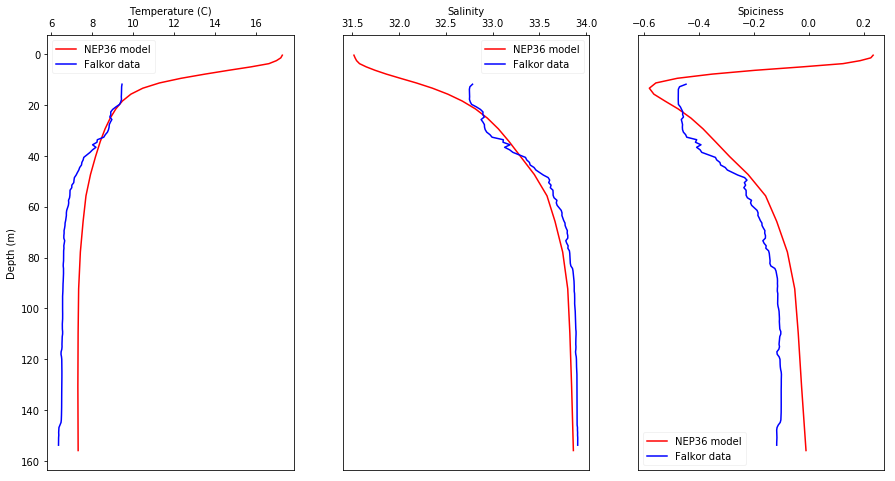

In [203]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[25,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[25,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[25,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

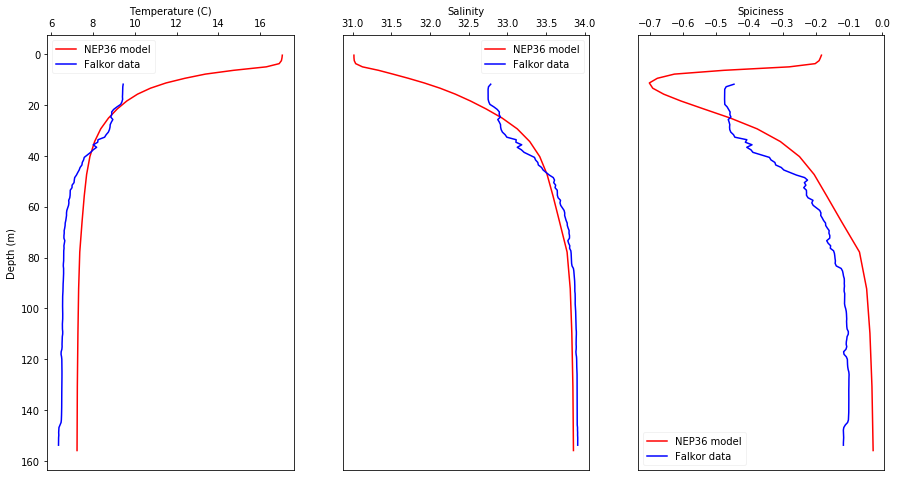

In [206]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[11,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[11,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[11,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

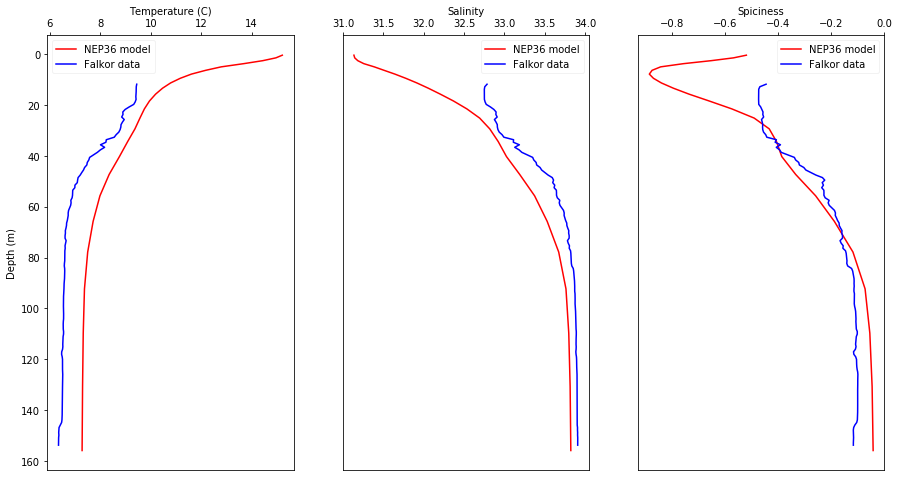

In [207]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[18,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[18,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[18,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

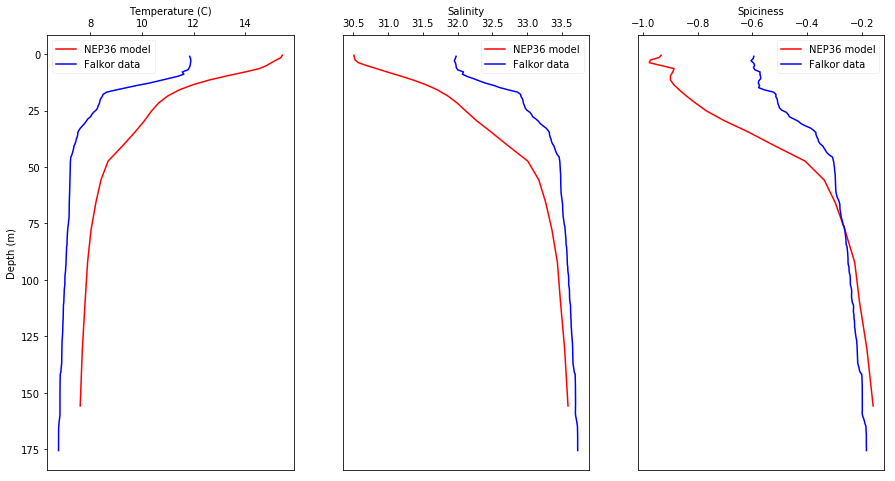

In [202]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[25,:25,y[21],x[21]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[25,:25,y[21],x[21]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[25,:25,y[21],x[21]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

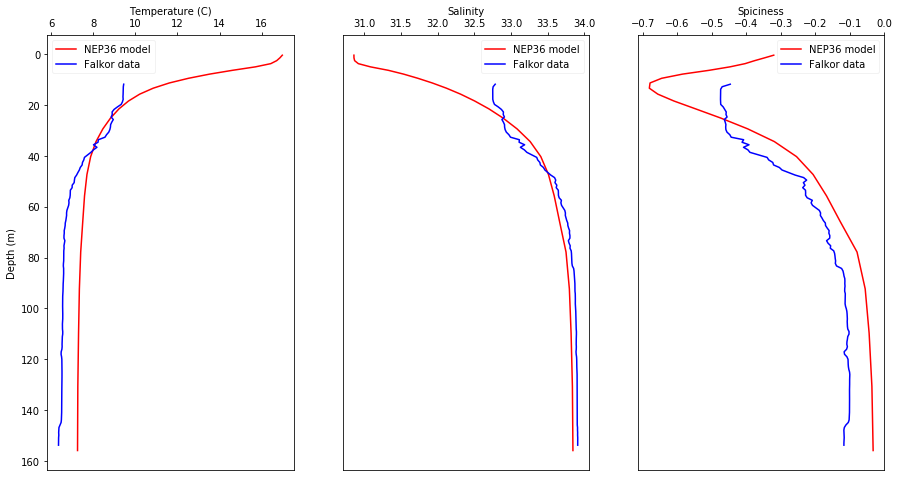

In [208]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[12,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_location[33],z_location[33],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[12,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_location[33],z_location[33],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[12,:25,y[33],x[33]],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[33],z_location[33],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

1) Relative vorticity and contours of it to show where the eddy lies

2) OOI endurance array (glider data) 

In [76]:
y, x = geo_tools.find_closest_model_point(
           lon_location[10],lat_location[10],lon_model,lat_model,tols={
    'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

In [77]:
print(y,x)

248 556


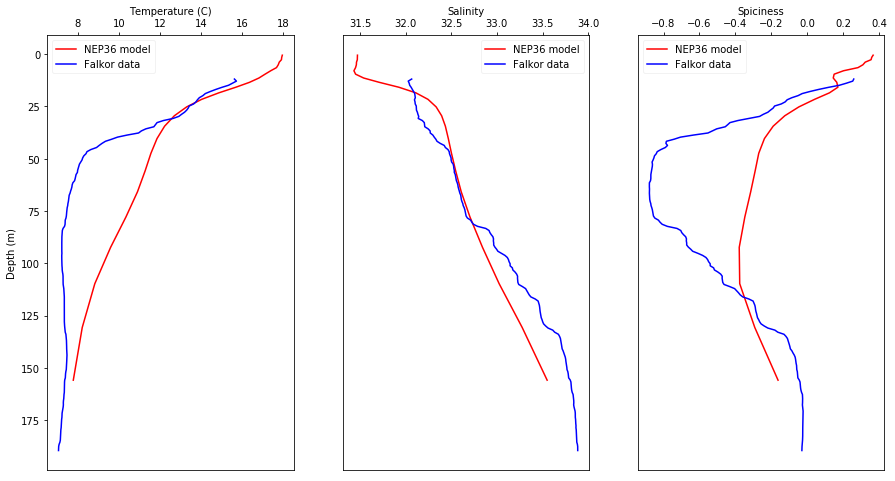

In [87]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[25,:25,y,x],zlevels[:25],'r',label = 'NEP36 model')
ax2.plot(temp_out[:180],heig[:180],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[25,:25,y,x],zlevels[:25],'r',label = 'NEP36 model')
ax3.plot(sal_out[:180],heig[:180],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[25,:25,y,x],zlevels[:25],'r',label = 'NEP36 model')
ax4.plot(spic_out[:180],heig[:180],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
# ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

In [86]:
heig = np.array(z_location[10])
sal_out = np.array(sal_location[10])
temp_out = np.array(temp_location[10])
spic_out = np.array(spic_falk_loc[10])

In [85]:
sal_out.shape

(2542,)

In [83]:
heig[380]

389.07369329257074

TypeError: contour() missing 1 required positional argument: 'self'

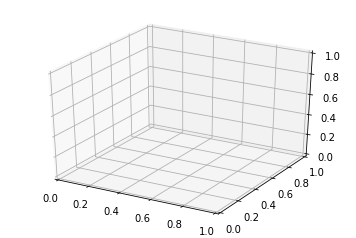

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.contour(X=lon_model, Y=lat_model, Z=spic_aug[0,...])

In [55]:

z_p,y_p,x_p = np.where(spic_aug[0,...]>-0.1)

In [40]:
spic_aug[0,...].shape

(50, 1021, 715)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_p, y_p, -z_p, zdir='z', c= 'red')
# plt.savefig("demo.png")

#### Along Isopycnal Spice of the NEP36 vs the model

#### Calculate density


In [21]:
def plotisosurface(sl,fieldtodo,survname,clm=[],cmap=cm.jet,pden0=26.4):

    from jmkplotting import colorline
    
    plotTopo()
    ax=gca()
    ax.set_axis_bgcolor('0.7')
    ind = where(sl['pden']>pden0)[0][0]
    h=plot(sl['longitude']-100.,sl['latitude'],visible=False)
    ax.set_aspect(1./cos(48.5*pi/180.))
    
    ylim([47.8,48.8])
    xlim([-126.-25./60.,-124.-40./60.])
    Z = squeeze(sl[fieldtodo][ind,:])
    bad = where(isnan(Z))

    Z = ma.masked_where(isnan(Z),Z)
    Z = ma.masked_where(Z==0.,Z)
    sc=scatter(sl['longitude']-100.,sl['latitude'],c=Z,cmap=cmap,edgecolor='None',zorder=20)
    clim(clm)
    colorbar(shrink=0.5,extend='both')
    title(r'%s on $\sigma_{\theta}$=%1.2f; %s' % (fieldtodo,pden0,survname))

In [ ]:
## get on isopycnals....


fname = 'pickleGrid/'+surv+'.pickle'
with open(fname,'rb') as pickf:
    cgrid = pickle.load(pickf)
cgrid.keys()
cgrid['x']=getDist(cgrid)
cgrid['O2']=getO2(cgrid['analog'],cgrid['temp'],cgrid['depths'])
cgrid['spice']=getSpice(cgrid['pden'],cgrid['temp'],cgrid['salinity'])

sl=dict()
sl['pden']=arange(25.,27.,0.25/8.)
M = size(sl['pden'])
N = size(cgrid['cast_number'])
togrids =['temp','salinity','spice','O2']
sl['x']=cgrid['x']
sl['longitude']=cgrid['longitude']
sl['latitude']=cgrid['latitude']

for togrid in togrids:
    sl[togrid]=zeros((M,N))
sl['depth']=zeros((M,N))
for i in range(0,N):
    good = where(~isnan(cgrid['pden'][:,i]))
    if size(good)>1:
        sl['depth'][:,i]=interp(sl['pden'],squeeze(cgrid['pden'][good,i])-1000.,cgrid['depths'][good],left=NaN,right=NaN)
        for togrid in togrids:
            #print shape(cgrid['pden'][good,i])
            sl[togrid][:,i]=interp(sl['pden'],squeeze(cgrid['pden'][good,i])-1000.,squeeze(cgrid[togrid][good,i]),left=NaN,right=NaN)

sl['depthdemean']=zeros((M,N))
for pd in arange(0,M,1.):
    sl['depthdemean'][pd,:]=-( sl['depth'][pd,:] - median(sl['depth'][pd,:]))

clf()
djmkfigure(2,0.95)
subplot(2,1,1)
pd0=26.4 
plotisosurface(sl,'spice',surv,clm=[-0.2,0.2],cmap=cm.RdBu_r,pden0=pd0)
try:
    subplot(2,1,2)
    plotisosurface(sl,'O2',surv,clm=[0,100],cmap=cm.jet,pden0=pd0)
except:
    print 'no O2'

if 0:
    jmkprint(surv+'spiceO2%3d'%(100*pd0),'MvpProc')
    savefig('doc/'+surv+'spiceO2%3d'%(100*pd0)+'.png',dpi=150)

In [ ]:
rho_jul

In [24]:

dens_cont = np.arange(25.,27.,0.25/8.)
M = dens_cont.shape[0]
N = sal_aug.shape[2]
P = sal_aug.shape[3]




In [25]:
print(M,N,P)

64 1021 715


In [ ]:
N = size(cgrid['cast_number'])

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


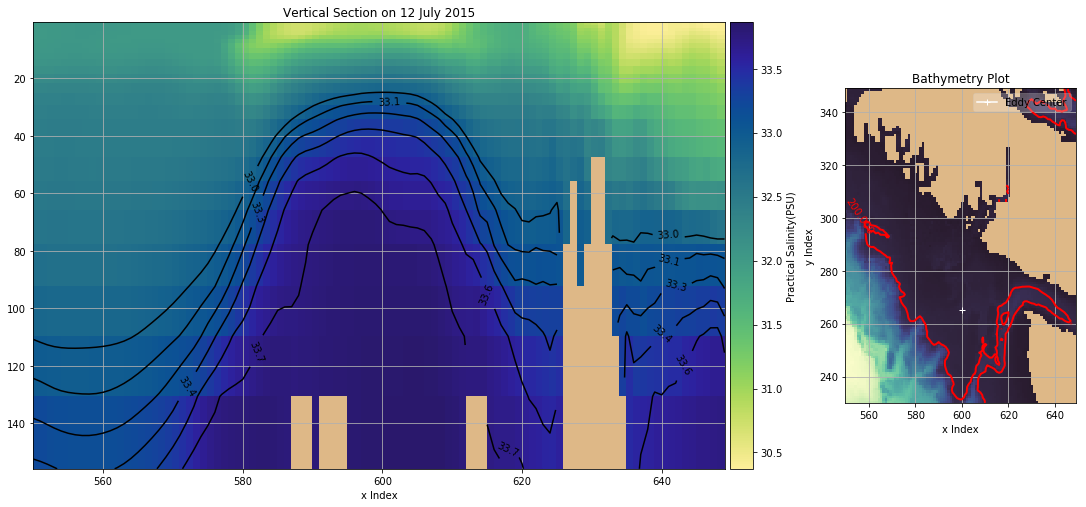

In [21]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))



# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
sal_0 = sal_jul[t, :25, :,:]

sal_tzyx = np.ma.masked_values(sal_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], cmap=cmap)#, vmin=14.5, vmax=15)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Practical Salinity(PSU)')
clines = axl.contour(x_wcvi_slice, zlevels[:25], sal_tzyx[:25,265,x_wcvi_slice], np.arange(33, 35, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical Section on {0} July 2015'.format(t))

In [33]:
sal_tzyx[-1,265,590:610]

masked_array(data = [-- -- -- -- -- -- -- -- -- 33.84855270385742 33.85047149658203
 33.853294372558594 33.85456848144531 33.86345291137695 33.86296844482422
 33.86454391479492 33.86623001098633 33.869110107421875 33.87055969238281
 33.86925506591797],
             mask = [ True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False],
       fill_value = 0.0)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


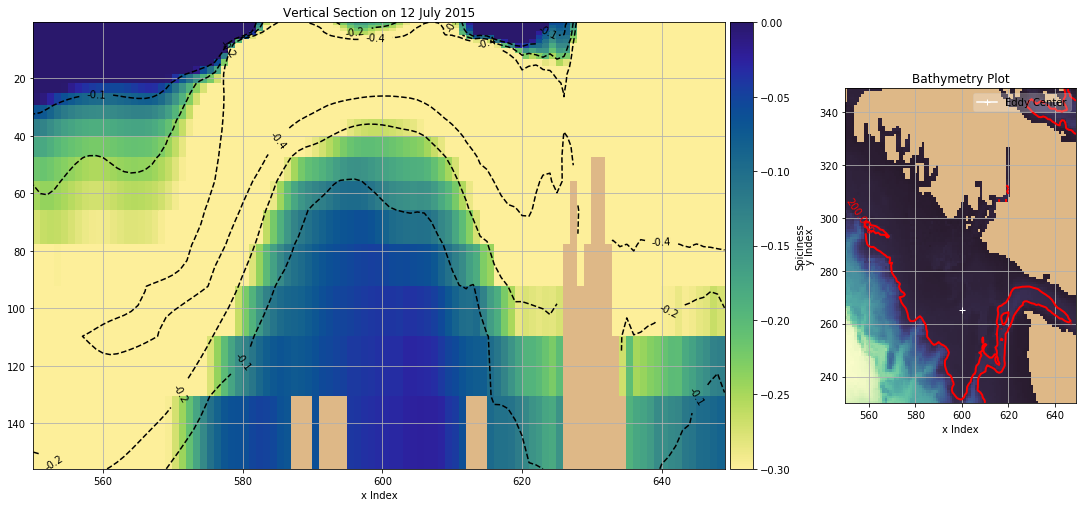

In [22]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))



# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.haline_r)
cmap.set_bad(land_colour)
spic_0 = spic_jul[t, :25, :,:]

spic_tzyx = np.ma.array(spic_0, mask = np.logical_not(sal_tzyx))
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=-0.3, vmax=0)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Spiciness')
clines = axl.contour(x_wcvi_slice, zlevels[:25], spic_tzyx[:25,265,x_wcvi_slice], np.arange(-0.4, 0, 0.15), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical Section on {0} July 2015'.format(t))

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


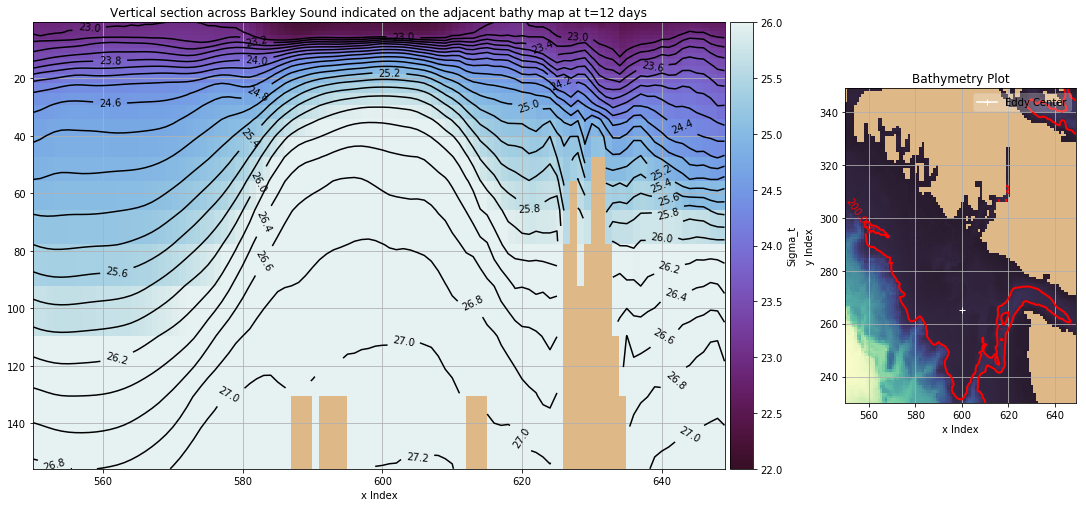

In [60]:
import gsw



# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
land_colour = 'burlywood'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.73, 0.125, 0.02, 0.775))
axr.set_position((0.83, 0.125, 0.2, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
cmap = plt.get_cmap(cmo.cm.deep_r)
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], cmap=cmap, vmin=0)
axr.plot(
    600, 265,
    linestyle='-', marker='+', color='white',
    label='Eddy Center',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)
axr.set_title('Bathymetry Plot')
axr.set_xlabel('x Index')
axr.set_ylabel('y Index')
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[230:350,550:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))


axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.dense_r)
cmap.set_bad(land_colour)
rho_0 = rho_jul[t,:25,:,:] - 1000

rho_tzyx = np.ma.array(rho_0, mask = np.logical_not(sal_tzyx))    
x, z = np.meshgrid(x_wcvi_slice, zlevels[:25])
mesh = axl.pcolormesh(x_wcvi_slice, zlevels[:25], rho_tzyx[:25,265,x_wcvi_slice], cmap=cmap, vmin=22, vmax=26)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Sigma_t')
clines = axl.contour(x_wcvi_slice, zlevels[:25], rho_tzyx[:25,265,x_wcvi_slice], np.arange(23, 30, 0.2), colors='black')
axl.clabel(clines, fmt='%1.1f', inline=True)
axl.invert_yaxis()
axl.set_xlabel('x Index')
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
axl.set_title('Vertical section across Barkley Sound indicated on the adjacent bathy map at t={0} days'.format(t))

In [ ]:
rom scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
x = linspace(1,4,11)
y = linspace(4,7,22)
z = linspace(7,9,33)
V = zeros((11,22,33))
for i in range(11):
    for j in range(22):
        for k in range(33):
            V[i,j,k] = 100*x[i] + 10*y[j] + z[k]

In [21]:
            
t = 12

dens_cont = np.arange(25.,27.,0.25/8.)
tol = 0.05

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

In [29]:
dens_cont = 26.4
tol = 0.05


t = 12

spic_iso = np.empty((y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))

for j in np.arange(y_wcvi_slice.shape[0]):
    for i in np.arange(x_wcvi_slice.shape[0]):
        V = rho_jul[t,:,j,i]-1000
        ind = []
        ind = np.where((V>dens_cont-tol)&(V<dens_cont+tol))
        if ind[0] != []:
            spic_iso[j,i] = spic_jul[t,ind[0],j,i]
        else:
            continue
        

In [30]:
spic_iso.shape

(120, 100)

In [26]:
ind[0]

array([], dtype=int64)

In [7]:
for iter in np.arange(dens_cont.shape[0]):
    for t in np.arange(sal_jul.shape[0]):
        V = rho_jul[t,:,y_wcvi_slice,x_wcvi_slice]-1000
        ind = np.where((V>dens_cont[iter]-tol)&(V<dens_cont[iter]+tol))
        spic_july = np.empty((t,dens_cont.shape[0],ind[1]))
        

In [67]:
V = rho_jul[t,:,y_wcvi_slice,x_wcvi_slice]-1000
spicy = spic_jul[t,:,y_wcvi_slice,x_wcvi_slice]

In [59]:
reset_selective V

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [26]:
V.shape

(50, 120, 100)

In [72]:
ind[1]

array([65, 66, 72, 73, 60, 61, 41, 42, 43, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [76]:
dens = 26.4
tol = 0.05

# ind = np.empty(y_wcvi_slice.shape[0])

# for j in y_wcvi_slice:
# for j in np.arange(y_wcvi_slice):

spicy_iso = np.empty((y_wcvi_slice.shape[0]))

for j in np.arange(y_wcvi_slice.shape[0]):
    ind = np.where((V[:,j,:]>dens-tol)&(V[:,j,:]<dens+tol))
    spicy_iso[j] = spicy[ind[0][:],j,ind[1][:]]

print(spicy_iso)
# V[ind[0][0],j,ind[1][0]]

ValueError: setting an array element with a sequence.

In [79]:
j

0

In [78]:
spicy[ind[0][:],j,ind[1][:]].shape

(30,)

In [52]:
ind[2].shape

(2482,)

In [11]:
t = 12
spic_iso = np.empty_like(spic_jul)

# for t in np.arange(sal_jul.shape[0]):
    
#     ind = np.where((V>dens-tol)&(V<dens+tol))
    
k = 1
for j in np.arange(sal_jul.shape[1]):
        spic_iso[t,k,j,i] = spic_jul[t,ind[0][:],ind[1][:],ind[2][:]]
 

MemoryError: 

In [13]:
ind[0][:].shape

(2482,)

In [48]:
spic_iso.shape

(2482,)

In [49]:
spic_iso

array([ 26.35046387,  26.35644531,  26.35498047, ...,  26.35095215,
        26.37060547,  26.37109375], dtype=float32)

In [22]:
fn = RegularGridInterpolator(y_wcvi_slice,x_wcvi_slice,zlevels,V)

pts = np.array([y_wcvi_slice,x_wcvi_slice,dens_cont])

In [23]:
dens_cont.shape

(64,)

In [ ]:
            

fn = RegularGridInterpolator((x,y,z), V)
pts = array([[2,6,8],[3,5,7]])
print(fn(pts))

In [81]:
isopycnals = np.arange(25.,27.,0.25/8.)

for iso in np.arange(isopycnals.shape[0]):
    print(iso)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [85]:
# rho_iso = 26.4
tol = 0.05

rho_iso = np.arange(25.,27.,0.25/8.)
tol = 0.05

print(sal_jul[12,...].shape)

sal_0 = sal_jul[12,...]

sal_tzyx = np.ma.masked_values(sal_0[...], 0)

rho_0 = rho_jul[...] - 1000

(50, 1021, 715)


In [ ]:
rho_tzyx = np.empty_like(rho_0)



for iso in np.arange(rho_iso.shape[0]):
    
    for t in np.arange(rho_jul.shape[0]):

        rho_tzyx[t,...] = np.ma.array(rho_0[t,...], mask = np.logical_not(sal_tzyx[...])) 

        for j in np.arange(rho_jul.shape[2]):

            ind = np.where((rho_tzyx[t,:,j,x_wcvi_slice]>rho_iso[iso]-tol)&(rho_tzyx[t,:,265,x_wcvi_slice]<rho_iso[iso]+tol))

            isoline_spice[t,iso,j,x_wcvi_slice[ind[1]][:]] =  spic_jul[t,ind[0],j,x_wcvi_slice[ind[1]][:]]
        
        
    
    

In [107]:
j

0

In [103]:
ind

(array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19,
        19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]),
 array([39, 40, 41, 42, 43, 50, 51, 52, 53, 54, 55, 56, 57, 36, 59, 60, 34,
        62, 31, 65, 28, 69, 70, 71, 72, 73, 74, 75, 92, 93, 94, 95, 96, 97,
        98, 99, 23, 24,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

In [75]:
ind

(array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19,
        19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]),
 array([39, 40, 41, 42, 43, 50, 51, 52, 53, 54, 55, 56, 57, 36, 59, 60, 34,
        62, 31, 65, 28, 69, 70, 71, 72, 73, 74, 75, 92, 93, 94, 95, 96, 97,
        98, 99, 23, 24,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

In [76]:
x_wcvi_slice[ind[1][:]]

array([589, 590, 591, 592, 593, 600, 601, 602, 603, 604, 605, 606, 607,
       586, 609, 610, 584, 612, 581, 615, 578, 619, 620, 621, 622, 623,
       624, 625, 642, 643, 644, 645, 646, 647, 648, 649, 573, 574, 551,
       552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563])

In [77]:
zlevels[ind[0][:]]

array([  47.37368774,   47.37368774,   47.37368774,   47.37368774,
         47.37368774,   47.37368774,   47.37368774,   47.37368774,
         47.37368774,   47.37368774,   47.37368774,   47.37368774,
         47.37368774,   55.76428986,   55.76428986,   55.76428986,
         65.80727386,   65.80727386,   77.85385132,   77.85385132,
         92.32607269,   92.32607269,   92.32607269,   92.32607269,
         92.32607269,   92.32607269,   92.32607269,   92.32607269,
         92.32607269,   92.32607269,   92.32607269,   92.32607269,
         92.32607269,   92.32607269,   92.32607269,   92.32607269,
        109.72927856,  109.72927856,  130.66598511,  130.66598511,
        130.66598511,  130.66598511,  130.66598511,  130.66598511,
        130.66598511,  130.66598511,  130.66598511,  130.66598511,
        130.66598511,  130.66598511,  130.66598511], dtype=float32)

In [44]:
spic_tzyx[-1,265,590:610]

masked_array(data = [-- -- -- -- -- -- -- -- -- -0.03095671348273754 -0.029780317097902298
 -0.02829737402498722 -0.027499288320541382 -0.02354772947728634
 -0.02365369163453579 -0.02283552475273609 -0.02205585315823555
 -0.02042982541024685 -0.019326990470290184 -0.01891377568244934],
             mask = [ True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False],
       fill_value = 1e+20)

In [117]:
sal_tzyx[Z[0],265,x_wcvi_slice[X[0]]]

-0.17895047

In [56]:
psal_0 = 33.6
tol = 0.05



ind = np.where((sal_tzyx[:25,265,x_wcvi_slice]>psal_0-tol)&(sal_tzyx[:25,265,x_wcvi_slice]<psal_0+tol))#[0][0]



In [80]:
for t in np.arange(sal_jul.shape[0]):
    for iter in np.arange(dens_cont.shape[0]):
        for j in np.arange(y_wcvi_slice.shape[0]):
            for i in np.arange(x_wcvi_slice.shape[0]):
                V = rho_jul[t,:,j,i]-1000

KeyboardInterrupt: 

In [124]:
V = rho_jul[12,:,265,560]-1000

In [125]:
V

array([ 22.96508789,  22.97808838,  23.01647949,  23.03918457,
        23.11236572,  23.31298828,  23.42645264,  23.52001953,
        23.62634277,  23.76470947,  23.94683838,  24.16186523,
        24.36401367,  24.51159668,  24.62915039,  24.73034668,
        24.82861328,  24.92944336,  25.0402832 ,  25.1809082 ,
        25.39099121,  25.69677734,  26.05175781,  26.41357422,
        26.80480957,  27.20739746,  27.56896973,  27.88977051,
        28.22680664,  28.59814453,  29.02941895,  29.52404785,
        30.09130859,  30.74401855,  31.49401855,  32.33581543,
        33.27929688,  34.29760742,   8.35253906,   9.6307373 ,
        11.02862549,  12.54180908,  14.16339111,  15.88452148,
        17.69488525,  19.58355713,  21.53900146,  23.55010986,
        25.60620117,  27.6973877 ], dtype=float32)

In [126]:
ind = np.where((V>26.4-0.05)&(V<26.4+0.05))

In [127]:
ind

(array([23]),)

In [111]:
np.equal(ind[0],[])

array([], dtype=bool)

In [85]:
tol

0.05

In [110]:
X = ind[1][:]

In [116]:
zlevels[X[0]]

2865.7026

In [64]:
zlevels[17]

47.373688

In [62]:
x_wcvi_slice[42]

592

In [120]:
spicyyyy = spic_jul[12,Z[:],265,x_wcvi_slice[X[:]]]

In [121]:
spicyyyy

array([[ -0.17895047,  -0.16561209,  -0.1556454 , ...,  -0.70096207,
         -0.69470721,  -0.77578419],
       [ -0.17895047,  -0.16561209,  -0.1556454 , ...,  -0.70096207,
         -0.69470721,  -0.77578419],
       [ -0.17895047,  -0.16561209,  -0.1556454 , ...,  -0.70096207,
         -0.69470721,  -0.77578419],
       ..., 
       [-24.32069969, -24.32069969, -24.32069969, ...,  -0.17085612,
         -0.14069608,  -0.12771119],
       [-24.32069969, -24.32069969, -24.32069969, ...,  -0.17085612,
         -0.14069608,  -0.12771119],
       [-24.32069969, -24.32069969, -24.32069969, ...,  -0.17085612,
         -0.14069608,  -0.12771119]], dtype=float32)

In [119]:
np.max(spicyyyy)

-0.0020045969

In [ ]:
h=plot(sl['longitude']-100.,sl['latitude'],visible=False)
ax.set_aspect(1./cos(48.5*pi/180.))

#scatter(
#clim(array([-1.,1.])*0.2)
ylim([47.8,48.8])
xlim([-126.-25./60.,-124.-40./60.])
Z = squeeze(sl[fieldtodo][ind,:])
bad = where(isnan(Z))

Z = ma.masked_where(isnan(Z),Z)
Z = ma.masked_where(Z==0.,Z)
sc=scatter(sl['longitude']-100.,sl['latitude'],c=Z,cmap=cmap,edgecolor='None',zorder=20)
clim(clm)
#plot(sl['longitude'][bad]-100.,sl['latitude'][bad],'s',
#     markerfacecolor='0.7',markersize=4,markeredgecolor='0.7')
colorbar(shrink=0.5,extend='both')
title(r'%s on $\sigma_{\theta}$=%1.2f; %s' % (fieldtodo,pden0,survname))

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


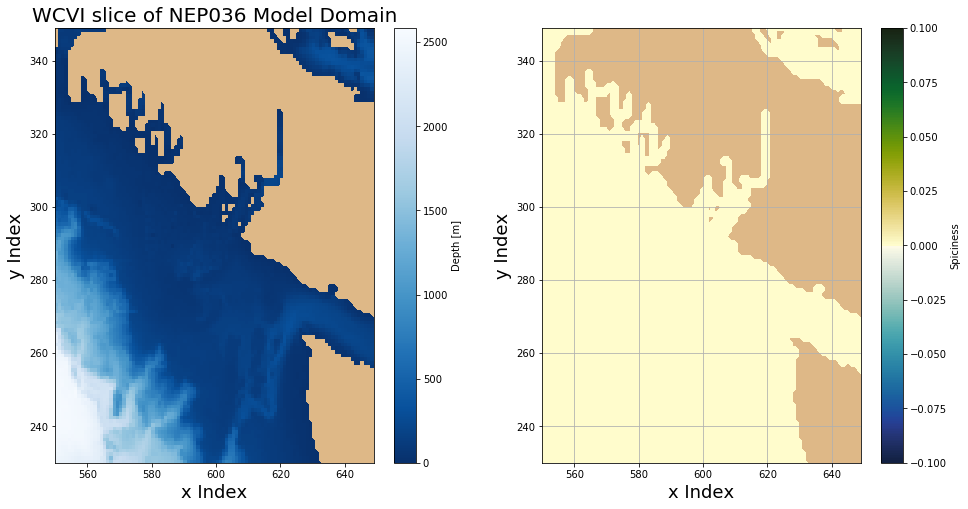

In [47]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20
level_falkor_1 = 66
level_falkor_2 = 77

Z_falk = np.array(z_location[33])
spice_falk = np.array(spic_falk_loc[33])




fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
# ax1.scatter(x[33], y[33], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.delta)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_iso, cmap=cmap, vmin = 0, vmax = 6.90568220e-310)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
# ax2.scatter(x[33], y[33], c= spice_falk[level_falkor_1], s=100, alpha=0.4, label = 'Falkor Point', cmap = cmap)
# ax2.scatter(x[21], y[21], c= spice_falk[level_falkor_2], s=100, alpha=0.4, label = 'Falkor Point', cmap = cmap)
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
# ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


In [38]:
spic_iso

array([[  6.90568220e-310,   6.90568220e-310,   5.63895066e-316, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       ..., 
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          2.42092166e-322,   4.94065646e-324,   4.94065646e-324]])

(array([], dtype=int64),)